<a href="https://colab.research.google.com/github/alexnunesfroes/Projeto_Embraer_ICD/blob/main/Projeto_Embraer_ICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Embraer - Indrodução Ciência de Dados
# Importação dos Pacotes
# Acesso aos Dados
# Automatização do dadaset analístico
# Fazendo uma previsão de venda


In [187]:
# Importação dos Pacotes :
# importação do pacote pandas de manipulação de dados
import pandas as pd
# pacote de funções matemáticas
import numpy as np
 # Gráficos
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# pacote de visualização de dados
import matplotlib.pyplot as plt
# pacote acesso aos dados
import gdown

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
# Biblioteca Python para Realizar o acesso aos Dados
!pip install gdown

In [189]:
# Carregando o arquivo excel
carros = pd.read_excel("preco-carros.xlsx")
# Lendo Dataset
print(carros)



            modelo   ano  preco_atu  preco_venda  kms_rodado combustivel  \
0             ritz  2014   34848.06     20883.90       27000      Petrol   
1              sx4  2013   59472.36     29611.50       43000      Diesel   
2             ciaz  2017   61404.90     45196.50        6900      Petrol   
3    wagon_x0020_r  2011   25871.10     17766.90        5200      Petrol   
4            swift  2014   42827.58      2867.64       42450      Diesel   
..             ...   ...        ...          ...         ...         ...   
296           city  2016    7231.44      5922.30       33988      Diesel   
297           brio  2015    3678.06       249.36       60000      Petrol   
298           city  2009     685.74     20883.90       87934      Petrol   
299           city  2017    7792.50      7169.10        9000      Diesel   
300           brio  2016    3678.06      3304.02        5464      Petrol   

    tipo_vendendor transmissao  proprietario  
0           Dealer      Manual          

In [190]:
# Automatização de análise do dataset analístico
!pip install pandas-profiling

import pandas as pd
from pandas_profiling import ProfileReport
from IPython.display import display, HTML

# Crie o relatório de perfil usando o Pandas Profiling
profile = ProfileReport(carros)

# Salve o relatório em HTML
profile.to_file("output.html")

# Exiba o relatório de perfil
display(HTML(profile.to_html()))


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Number of variables,9
Number of observations,301
Missing cells,0
Missing cells (%),0.0%
Duplicate rows,2
Duplicate rows (%),0.7%
Total size in memory,21.3 KiB
Average record size in memory,72.4 B
Categorical,5
Numeric,4
Dataset has 2 (0.7%) duplicate rows,Duplicates


In [ ]:
# Carregando o arquivo
carros = pd.read_excel('preco-carros.xlsx')

# Mostrando as primeiras linhas do dataframe
carros.head()

,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario
0,ritz,2014,34848.06,20883.90,27000,Petrol,Dealer,Manual,0
1,sx4,2013,59472.36,29611.50,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,61404.90,45196.50,6900,Petrol,Dealer,Manual,0
3,wagon_x0020_r,2011,25871.10,17766.90,5200,Petrol,Dealer,Manual,0
4,swift,2014,42827.58,2867.64,42450,Diesel,Dealer,Manual,0


In [191]:
# Removendo linhas duplicadas
carros = carros.drop_duplicates()
print(carros)


            modelo   ano  preco_atu  preco_venda  kms_rodado combustivel  \
0             ritz  2014   34848.06     20883.90       27000      Petrol   
1              sx4  2013   59472.36     29611.50       43000      Diesel   
2             ciaz  2017   61404.90     45196.50        6900      Petrol   
3    wagon_x0020_r  2011   25871.10     17766.90        5200      Petrol   
4            swift  2014   42827.58      2867.64       42450      Diesel   
..             ...   ...        ...          ...         ...         ...   
296           city  2016    7231.44      5922.30       33988      Diesel   
297           brio  2015    3678.06       249.36       60000      Petrol   
298           city  2009     685.74     20883.90       87934      Petrol   
299           city  2017    7792.50      7169.10        9000      Diesel   
300           brio  2016    3678.06      3304.02        5464      Petrol   

    tipo_vendendor transmissao  proprietario  
0           Dealer      Manual          

In [195]:
# Verificar as Variáveis (colunas-campos-features) :
carros.columns

Index(['modelo', 'ano', 'preco_atu', 'preco_venda', 'kms_rodado',
       'combustivel', 'tipo_vendendor', 'transmissao', 'proprietario'],
      dtype='object')

In [196]:
# Escolher as Variáveis e salvar no dataset:
dataset = carros[['ano', 'preco_venda', 'preco_atu', 'kms_rodado',
       'combustivel', 'tipo_vendendor', 'transmissao', 'proprietario']]

In [197]:
# Visualizar o data set :
dataset.head()

,ano,preco_venda,preco_atu,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario
0,2014,20883.90,34848.06,27000,Petrol,Dealer,Manual,0
1,2013,29611.50,59472.36,43000,Diesel,Dealer,Manual,0
2,2017,45196.50,61404.90,6900,Petrol,Dealer,Manual,0
3,2011,17766.90,25871.10,5200,Petrol,Dealer,Manual,0
4,2014,2867.64,42827.58,42450,Diesel,Dealer,Manual,0


In [198]:
# Criação de um campo com o ano corrente:
dataset['ano_atual'] = 2023

In [199]:
# Criar a nova coluna - Idade do carro
dataset['idade_carro'] = dataset['ano_atual']-dataset['ano']

In [ ]:
# Visualizar o dataset
dataset.head()

,ano,preco_venda,preco_atu,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario,ano_atual,idade_carro
0,2014,20883.90,34848.06,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,29611.50,59472.36,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,45196.50,61404.90,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,17766.90,25871.10,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,2867.64,42827.58,42450,Diesel,Dealer,Manual,0,2023,9


In [200]:
# Eliminar (dropar) as coolunas desnecessárias :
dataset.drop(['ano', 'ano_atual'],axis =1, inplace = True)

In [201]:
# Transformar campos textuais em numéricos - OneHotCoding :
dataset = pd.get_dummies(dataset,drop_first = True)

In [202]:
dataset.head()

,preco_venda,preco_atu,kms_rodado,proprietario,idade_carro,combustivel_Diesel,combustivel_Petrol,tipo_vendendor_Individual,transmissao_Manual
0,20883.90,34848.06,27000,0,9,0,1,0,1
1,29611.50,59472.36,43000,0,10,1,0,0,1
2,45196.50,61404.90,6900,0,6,0,1,0,1
3,17766.90,25871.10,5200,0,12,0,1,0,1
4,2867.64,42827.58,42450,0,9,1,0,0,1


In [203]:
 #Separação das variáveis explicativa e o Target (variável que queremos prever) :
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [204]:
# Separação das amostras para treinamento e teste da Máquina Preditiva - Train Test Split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [205]:
# Lendo treinamento
X_train

,preco_atu,kms_rodado,proprietario,idade_carro,combustivel_Diesel,combustivel_Petrol,tipo_vendendor_Individual,transmissao_Manual
160,5922.30,24000,0,12,0,1,1,1
145,5049.54,19000,0,11,0,1,1,1
39,49747.32,62000,0,20,0,1,0,1
41,24811.32,46706,0,9,0,1,0,1
278,5236.56,4000,0,7,0,1,0,1
...,...,...,...,...,...,...,...,...
275,8478.24,30753,0,7,0,1,0,0
127,498.72,7000,0,7,0,1,1,1
9,55607.28,42367,0,8,1,0,0,1
238,5859.96,60241,0,10,0,1,0,1


In [206]:
# Lendo teste
X_test

,preco_atu,kms_rodado,proprietario,idade_carro,combustivel_Diesel,combustivel_Petrol,tipo_vendendor_Individual,transmissao_Manual
293,6171.66,38000,0,13,0,1,0,1
7,53674.74,33429,0,8,1,0,0,1
194,49061.58,50000,0,15,0,1,1,1
101,11345.88,1400,0,6,0,1,1,1
295,81603.06,60076,0,8,1,0,0,1
6,50620.08,18796,0,8,0,1,0,1
144,6171.66,25000,0,9,0,1,1,1
112,1496.16,7000,0,9,0,1,1,1
177,3553.38,24000,0,7,0,1,1,0
190,4675.50,60000,0,15,0,1,1,1


In [207]:
# Utilização do Algoritmo RandomForestRegressor  para criação da Máquina Preditiva:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [208]:
#Treinamento da MP com os dados de treino
rf_random.fit(X_train,y_train)

RandomForestRegressor()

In [209]:
# Teste da MP com novos Dados
predictions = rf_random.predict(X_test)

In [210]:
# Lendo previsões
predictions

array([12454.2852, 26435.9004,  1728.6882,  7003.2756, 43984.6104,
       17645.337 ,  1289.8146,  4537.7286,  1209.396 ,  1194.4344,
        3527.8206, 13029.06  ,  2056.5966,  1753.0008,  1577.8254,
       15528.894 ,  3916.8222, 18380.949 , 17069.9388,   845.9538,
       11800.962 , 18077.9766, 31160.649 ,  7660.9626,  2080.9092,
        6318.7824, 42567.6222,  3176.8464, 13312.0836, 10400.8056,
       34396.095 , 75811.0506, 25092.4734, 18956.9706,  6471.5154,
        2245.4868,  9478.797 , 11978.0076, 28533.6414,  5114.3736,
       12413.7642,  3734.7894, 11388.2712,  2476.7682,  3049.0494,
       34973.3634, 24527.673 , 20547.8874,  2074.0518,  1271.1126,
       22789.0104, 36380.3772, 27203.9292, 37409.6106, 22245.4056,
       14701.6422, 58676.2782, 41302.1202, 19481.25  ,  5771.4372])

<Axes: xlabel='preco_venda', ylabel='Density'>

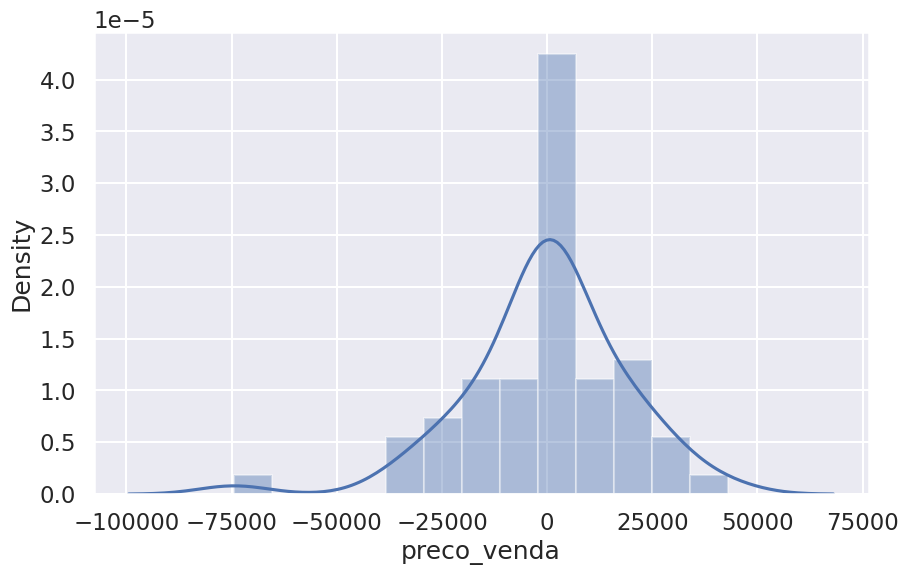

In [211]:
# Avaliação da Máquina Preditiva
sns.distplot(y_test-predictions)

In [212]:
# Salvamento da MP como arquivo "pkl"
import pickle
file = open('Random_forest_regression_model.pkl','wb')
pickle.dump(rf_random,file)

# Projeto Parte I
# Preparando para fazer teste para Regressão Simples

In [213]:
#Regressão linear simples
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
print(carros.describe())

               ano     preco_atu    preco_venda     kms_rodado  proprietario
count   299.000000     299.00000     299.000000     299.000000    299.000000
mean   2013.615385   31477.53010   15288.937124   36916.752508      0.043478
std       2.896868   45416.49133   22492.100802   39015.170352      0.248720
min    2003.000000     436.38000      62.340000     500.000000      0.000000
25%    2012.000000    4239.12000    1745.520000   15000.000000      0.000000
50%    2014.000000    7356.12000    4052.100000   32000.000000      0.000000
75%    2016.000000   44760.12000   21819.000000   48883.500000      0.000000
max    2018.000000  225857.82000  129355.500000  500000.000000      3.000000


Text(0, 0.5, ' ($) Preco Venda do Automóvel')

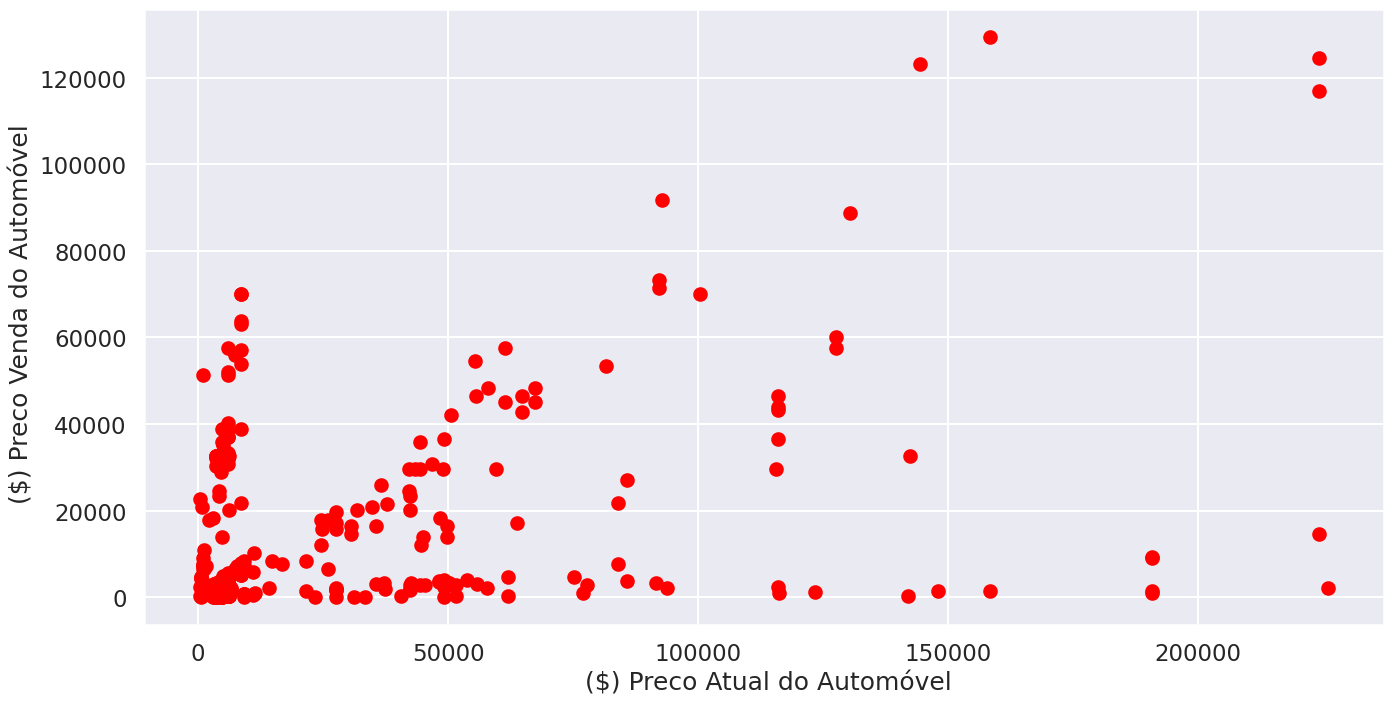

In [214]:
#Primeiro vamos criar uma plotagem para entendermos o comportamento do que é preco_atu com relação ao retorno de preco_venda:
plt.figure(figsize = (16,8))
plt.scatter(
    carros['preco_atu'],
    carros['preco_venda'],
    c='red')
plt.xlabel(" ($) Preco Atual do Automóvel")
plt.ylabel(" ($) Preco Venda do Automóvel")

In [215]:
#Como você pode observar, existe uma relação clara entre o preco_atu e o retorno em preco_venda.
#Agora vamos criar o modelo para prever o quanto teremos de retorno com o investimento em preco_atu:
X = carros['preco_atu'].values.reshape(-1,1)
y = carros['preco_venda'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [216]:
# O "X" representa o valor investido em preco_atu, ou seja, essa é a conta matemática que nos ajuda a prever o retorno de um investimento!

# Agora vamos plotar o nosso modelo em cima dos dados e analisar se ele é bom, ruim, explica muito ou explica pouco o comportamento de nossos dados:
print("O modelo é: Vendas = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Vendas = 9026.6 + 0.19895X


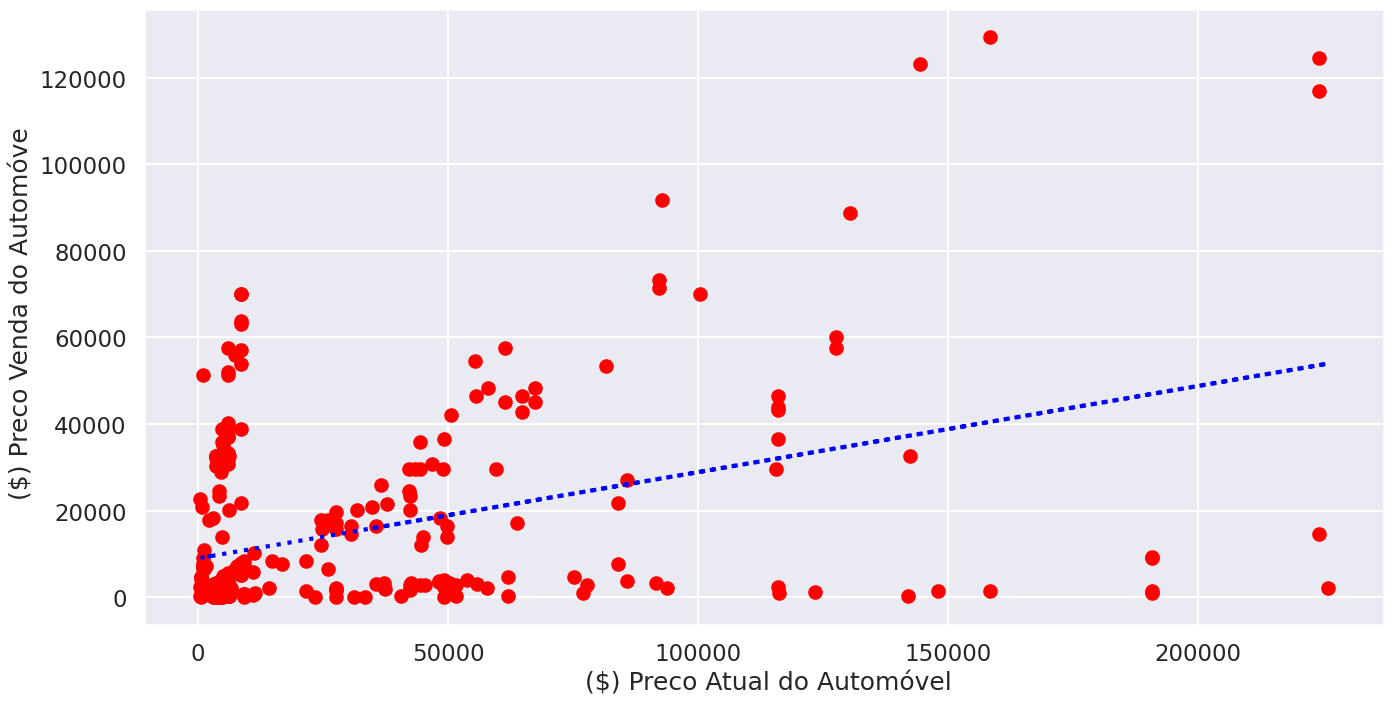

In [217]:
# Avaliando a precisão do modelo:
# Pontos vermelhos: são os valores reais do nosso conjunto de dados
# Linha azul: ela representa os erros entre os valores reais e os valores preditos pelo nosso modelo
f_previsaoes = reg.predict(X)


plt.figure(figsize = (16,8))
plt.scatter(
    carros['preco_atu'],
    carros['preco_venda'],
    c='red')


plt.plot(
    carros['preco_atu'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" ($) Preco Atual do Automóvel")
plt.ylabel(" ($) Preco Venda do Automóve")
plt.show()

In [218]:
# Com o código a baixo criamos um resumo que mostra várias características de nosso modelo. Avaliaremos sua qualidade através do R² e do "p-valor":
# Observe que o R² está em 0.161, isso quer dizer que aproximadamente 16% do comportamento da variável "Preco Vendas" é explicado pela variável "Preco Atual".
# Quando analisamos o "p-valor" observamos que ele está bem baixo, algo bem próximo à zero foi encoberto pelo arredondamento, isso nos faz rejeitar a hipótese nula.
X = carros['preco_atu']
y = carros['preco_venda']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            preco_venda   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     57.15
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           5.06e-13
Time:                        20:20:33   Log-Likelihood:                -3393.7
No. Observations:                 299   AIC:                             6791.
Df Residuals:                     297   BIC:                             6799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9026.6066   1452.544      6.214      0.0

In [219]:
# Setando campos como categóricos
carros.dtypes

modelo             object
ano                 int64
preco_atu         float64
preco_venda       float64
kms_rodado          int64
combustivel        object
tipo_vendendor     object
transmissao        object
proprietario        int64
dtype: object

In [220]:
#ajustando tipos dos dados
carros['modelo'] = carros['modelo'].astype('category')
carros['combustivel'] = carros['combustivel'].astype('category')
carros['tipo_vendendor'] = carros['tipo_vendendor'].astype('category')
carros['transmissao'] = carros['transmissao'].astype('category')



In [221]:
carros.dtypes

modelo            category
ano                  int64
preco_atu          float64
preco_venda        float64
kms_rodado           int64
combustivel       category
tipo_vendendor    category
transmissao       category
proprietario         int64
dtype: object

In [222]:
carros['modelo'].cat.categories

Index(['Activa_x0020_3g', 'Activa_x0020_4g', 'Bajaj_x0020_Avenger_x0020_150',
       'Bajaj_x0020_Avenger_x0020_150_x0020_street',
       'Bajaj_x0020_Avenger_x0020_220',
       'Bajaj_x0020_Avenger_x0020_220_x0020_dtsi',
       'Bajaj_x0020_Avenger_x0020_Street_x0020_220',
       'Bajaj_x0020_Discover_x0020_100', 'Bajaj_x0020_Discover_x0020_125',
       'Bajaj_x0020_Dominar_x0020_400',
       'Bajaj_x0020_Pulsar_x0020_135_x0020_LS', 'Bajaj_x0020_Pulsar_x0020_150',
       'Bajaj_x0020_Pulsar_x0020_220_x0020_F',
       'Bajaj_x0020_Pulsar_x0020_NS_x0020_200',
       'Bajaj_x0020_Pulsar_x0020_RS200',
       'Bajaj_x0020_Pulsar_x0020__x0020_NS_x0020_200',
       'Bajaj_x0020__x0020_ct_x0020_100', 'Hero_x0020_Extreme',
       'Hero_x0020_Glamour', 'Hero_x0020_Honda_x0020_CBZ_x0020_extreme',
       'Hero_x0020_Honda_x0020_Passion_x0020_Pro', 'Hero_x0020_Hunk',
       'Hero_x0020_Passion_x0020_Pro', 'Hero_x0020_Passion_x0020_X_x0020_pro',
       'Hero_x0020_Splender_x0020_Plus', 'Hero_x0020_

In [223]:
carros['transmissao'].cat.categories

Index(['Automatic', 'Manual'], dtype='object')

In [224]:
carros['transmissao'] = carros['transmissao'].cat.codes

In [225]:
carros.head()

,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario
0,ritz,2014,34848.06,20883.90,27000,Petrol,Dealer,1,0
1,sx4,2013,59472.36,29611.50,43000,Diesel,Dealer,1,0
2,ciaz,2017,61404.90,45196.50,6900,Petrol,Dealer,1,0
3,wagon_x0020_r,2011,25871.10,17766.90,5200,Petrol,Dealer,1,0
4,swift,2014,42827.58,2867.64,42450,Diesel,Dealer,1,0


In [226]:
carros.dtypes

modelo            category
ano                  int64
preco_atu          float64
preco_venda        float64
kms_rodado           int64
combustivel       category
tipo_vendendor    category
transmissao           int8
proprietario         int64
dtype: object

In [227]:
# Removendo instâncias
carros.shape

(299, 9)

In [228]:

print(carros.isnull().sum())

modelo            0
ano               0
preco_atu         0
preco_venda       0
kms_rodado        0
combustivel       0
tipo_vendendor    0
transmissao       0
proprietario      0
dtype: int64


In [229]:
# remove instâncias com ao menos 1 coluna com dado ausente
carros1 = carros.dropna()
carros1.head()

,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario
0,ritz,2014,34848.06,20883.90,27000,Petrol,Dealer,1,0
1,sx4,2013,59472.36,29611.50,43000,Diesel,Dealer,1,0
2,ciaz,2017,61404.90,45196.50,6900,Petrol,Dealer,1,0
3,wagon_x0020_r,2011,25871.10,17766.90,5200,Petrol,Dealer,1,0
4,swift,2014,42827.58,2867.64,42450,Diesel,Dealer,1,0


In [230]:

len(carros1)

299

In [231]:
print(carros1.isnull().sum())

modelo            0
ano               0
preco_atu         0
preco_venda       0
kms_rodado        0
combustivel       0
tipo_vendendor    0
transmissao       0
proprietario      0
dtype: int64


In [232]:
# Removendo colunas quase vaziais
print(carros.isnull().sum())

modelo            0
ano               0
preco_atu         0
preco_venda       0
kms_rodado        0
combustivel       0
tipo_vendendor    0
transmissao       0
proprietario      0
dtype: int64


In [233]:
#remove colunas com ao menos 70% de dados ausentes
carros2 = carros.dropna(thresh=0.7*len(carros), axis=1)

In [234]:

carros2.head()

,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario
0,ritz,2014,34848.06,20883.90,27000,Petrol,Dealer,1,0
1,sx4,2013,59472.36,29611.50,43000,Diesel,Dealer,1,0
2,ciaz,2017,61404.90,45196.50,6900,Petrol,Dealer,1,0
3,wagon_x0020_r,2011,25871.10,17766.90,5200,Petrol,Dealer,1,0
4,swift,2014,42827.58,2867.64,42450,Diesel,Dealer,1,0


In [235]:
print(carros2.isnull().sum())

modelo            0
ano               0
preco_atu         0
preco_venda       0
kms_rodado        0
combustivel       0
tipo_vendendor    0
transmissao       0
proprietario      0
dtype: int64


In [236]:
# Inserindo dados ausentes em 1 coluna
print(carros2['preco_atu'].mean())
print(carros2['preco_atu'].median())

31477.530100334447
7356.12


In [237]:
#adiciona media de preco_atu nos dados ausentes de preco_atu
carros2['preco_atu'].fillna(carros2['preco_atu'].mean(), inplace=True)

In [238]:
print(carros2.isnull().sum())

modelo            0
ano               0
preco_atu         0
preco_venda       0
kms_rodado        0
combustivel       0
tipo_vendendor    0
transmissao       0
proprietario      0
dtype: int64


In [239]:
print(carros2['preco_atu'].mean())
print(carros2['preco_atu'].median())

31477.530100334447
7356.12


In [240]:
carros2.corr(method='spearman')

,ano,preco_atu,preco_venda,kms_rodado,transmissao,proprietario
ano,1.000000,-0.111718,0.176180,-0.637073,-0.036637,-0.137621
preco_atu,-0.111718,1.000000,0.318905,0.305938,-0.220900,-0.051373
preco_venda,0.176180,0.318905,1.000000,0.084740,-0.008055,-0.091603
kms_rodado,-0.637073,0.305938,0.084740,1.000000,-0.022091,0.024800
transmissao,-0.036637,-0.220900,-0.008055,-0.022091,1.000000,0.021171
proprietario,-0.137621,-0.051373,-0.091603,0.024800,0.021171,1.000000


In [241]:
carros.corr(method='spearman')

,ano,preco_atu,preco_venda,kms_rodado,transmissao,proprietario
ano,1.000000,-0.111718,0.176180,-0.637073,-0.036637,-0.137621
preco_atu,-0.111718,1.000000,0.318905,0.305938,-0.220900,-0.051373
preco_venda,0.176180,0.318905,1.000000,0.084740,-0.008055,-0.091603
kms_rodado,-0.637073,0.305938,0.084740,1.000000,-0.022091,0.024800
transmissao,-0.036637,-0.220900,-0.008055,-0.022091,1.000000,0.021171
proprietario,-0.137621,-0.051373,-0.091603,0.024800,0.021171,1.000000


In [242]:
#remove colunas com até 70% de dados ausentes
carros2 = carros.dropna(thresh=0.7*len(carros), axis=1)
#adiciona mediana de preco_atu nos dados ausentes de preco_atu
carros2['preco_atu'].fillna(carros2['preco_atu'].median(), inplace=True)


In [243]:
print(carros2['preco_atu'].mean())
print(carros2['preco_atu'].median())

31477.530100334447
7356.12


In [244]:
carros.corr(method='spearman')

,ano,preco_atu,preco_venda,kms_rodado,transmissao,proprietario
ano,1.000000,-0.111718,0.176180,-0.637073,-0.036637,-0.137621
preco_atu,-0.111718,1.000000,0.318905,0.305938,-0.220900,-0.051373
preco_venda,0.176180,0.318905,1.000000,0.084740,-0.008055,-0.091603
kms_rodado,-0.637073,0.305938,0.084740,1.000000,-0.022091,0.024800
transmissao,-0.036637,-0.220900,-0.008055,-0.022091,1.000000,0.021171
proprietario,-0.137621,-0.051373,-0.091603,0.024800,0.021171,1.000000


In [245]:
carros2.corr(method='spearman')

,ano,preco_atu,preco_venda,kms_rodado,transmissao,proprietario
ano,1.000000,-0.111718,0.176180,-0.637073,-0.036637,-0.137621
preco_atu,-0.111718,1.000000,0.318905,0.305938,-0.220900,-0.051373
preco_venda,0.176180,0.318905,1.000000,0.084740,-0.008055,-0.091603
kms_rodado,-0.637073,0.305938,0.084740,1.000000,-0.022091,0.024800
transmissao,-0.036637,-0.220900,-0.008055,-0.022091,1.000000,0.021171
proprietario,-0.137621,-0.051373,-0.091603,0.024800,0.021171,1.000000


In [246]:
carros['preco_atu'].describe()

count       299.00000
mean      31477.53010
std       45416.49133
min         436.38000
25%        4239.12000
50%        7356.12000
75%       44760.12000
max      225857.82000
Name: preco_atu, dtype: float64

In [247]:
import random
carros2 = carros.dropna(thresh=0.7*len(carros), axis=1)
#adiciona valor aleatório no intervalo de min e max de preco_atu nos dados ausentes de preco_atu
carros2['preco_atu'].fillna(random.gammavariate(carros2['preco_atu'].min(),carros2['preco_atu'].max()), inplace=True)


In [248]:
print(carros2['preco_atu'].mean())
print(carros2['preco_atu'].median())

31477.530100334447
7356.12


In [249]:
# Inserindo dados ausentes em mais de uma coluna
carros = pd.read_excel("/content/preco-carros.xlsx")
carros.head()

,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario
0,ritz,2014,34848.06,20883.90,27000,Petrol,Dealer,Manual,0
1,sx4,2013,59472.36,29611.50,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,61404.90,45196.50,6900,Petrol,Dealer,Manual,0
3,wagon_x0020_r,2011,25871.10,17766.90,5200,Petrol,Dealer,Manual,0
4,swift,2014,42827.58,2867.64,42450,Diesel,Dealer,Manual,0


In [250]:
#ajustando tipos dos dados
carros['modelo'] = carros['modelo'].astype('category')
carros['combustivel'] = carros['combustivel'].astype('category')
carros['tipo_vendendor'] = carros['tipo_vendendor'].astype('category')
carros['transmissao'] = carros['transmissao'].astype('category')


In [251]:
carros['modelo'] = carros['modelo'].cat.codes
carros['combustivel'] = carros['combustivel'].cat.codes
carros['tipo_vendendor'] = carros['tipo_vendendor'].cat.codes
carros['transmissao'] = carros['transmissao'].cat.codes

In [252]:
carros.head()

,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario
0,90,2014,34848.06,20883.90,27000,2,0,1,0
1,93,2013,59472.36,29611.50,43000,1,0,1,0
2,68,2017,61404.90,45196.50,6900,2,0,1,0
3,96,2011,25871.10,17766.90,5200,2,0,1,0
4,92,2014,42827.58,2867.64,42450,1,0,1,0


In [253]:
!pip install fancyimpute
from fancyimpute import KNN
carros_knn = KNN(k=3).fit_transform(carros)

Imputing row 1/301 with 0 missing, elapsed time: 0.029
Imputing row 101/301 with 0 missing, elapsed time: 0.030
Imputing row 201/301 with 0 missing, elapsed time: 0.030
Imputing row 301/301 with 0 missing, elapsed time: 0.030


/usr/local/lib/python3.10/dist-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [254]:
carros_knn.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(301, 9)

In [255]:
carros3 = pd.DataFrame(data=carros_knn[0:,0:],columns=['modelo',	'ano',	'preco_atu',	'preco_venda',	'kms_rodado',	'combustivel',	'tipo_vendedor',	'transmissao', 'proprietario'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [256]:
carros3.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendedor,transmissao,proprietario
0,90.0,2014.0,34848.06,20883.90,27000.0,2.0,0.0,1.0,0.0
1,93.0,2013.0,59472.36,29611.50,43000.0,1.0,0.0,1.0,0.0
2,68.0,2017.0,61404.90,45196.50,6900.0,2.0,0.0,1.0,0.0
3,96.0,2011.0,25871.10,17766.90,5200.0,2.0,0.0,1.0,0.0
4,92.0,2014.0,42827.58,2867.64,42450.0,1.0,0.0,1.0,0.0


In [257]:
print(carros3.isnull().sum())

modelo           0
ano              0
preco_atu        0
preco_venda      0
kms_rodado       0
combustivel      0
tipo_vendedor    0
transmissao      0
proprietario     0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [258]:
carros3['modelo'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    301.000000
mean      62.365449
std       25.862702
min        0.000000
25%       46.000000
50%       69.000000
75%       82.000000
max       97.000000
Name: modelo, dtype: float64

In [259]:
# Normalização
carros3.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendedor,transmissao,proprietario
0,90.0,2014.0,34848.06,20883.90,27000.0,2.0,0.0,1.0,0.0
1,93.0,2013.0,59472.36,29611.50,43000.0,1.0,0.0,1.0,0.0
2,68.0,2017.0,61404.90,45196.50,6900.0,2.0,0.0,1.0,0.0
3,96.0,2011.0,25871.10,17766.90,5200.0,2.0,0.0,1.0,0.0
4,92.0,2014.0,42827.58,2867.64,42450.0,1.0,0.0,1.0,0.0


In [260]:
#preço está dominando o cálculo
dist = np.linalg.norm(carros3.values[1]-carros3.values[2])
print(dist)

39367.97655267032


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [261]:
# normalizando min-max
carros_norm = (carros3 - carros3.min()) / (carros3.max() - carros3.min())
print(carros_norm.head())

     modelo       ano  preco_atu  preco_venda  kms_rodado  combustivel  \
0  0.927835  0.733333   0.152655     0.161041    0.053053          1.0   
1  0.958763  0.666667   0.261892     0.228544    0.085085          0.5   
2  0.701031  0.933333   0.270465     0.349084    0.012813          1.0   
3  0.989691  0.533333   0.112832     0.136933    0.009409          1.0   
4  0.948454  0.733333   0.188053     0.021697    0.083984          0.5   

   tipo_vendedor  transmissao  proprietario  
0            0.0          1.0           0.0  
1            0.0          1.0           0.0  
2            0.0          1.0           0.0  
3            0.0          1.0           0.0  
4            0.0          1.0           0.0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [262]:
carros_norm = carros_norm.dropna(thresh=0.7*len(carros), axis=1)
print(carros_norm.head())

     modelo       ano  preco_atu  preco_venda  kms_rodado  combustivel  \
0  0.927835  0.733333   0.152655     0.161041    0.053053          1.0   
1  0.958763  0.666667   0.261892     0.228544    0.085085          0.5   
2  0.701031  0.933333   0.270465     0.349084    0.012813          1.0   
3  0.989691  0.533333   0.112832     0.136933    0.009409          1.0   
4  0.948454  0.733333   0.188053     0.021697    0.083984          0.5   

   tipo_vendedor  transmissao  proprietario  
0            0.0          1.0           0.0  
1            0.0          1.0           0.0  
2            0.0          1.0           0.0  
3            0.0          1.0           0.0  
4            0.0          1.0           0.0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [263]:
dist = np.linalg.norm(carros_norm.values[1]-carros_norm.values[2])
print(dist)

0.6382503801397724


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [264]:
# nomarlizando entre 0 e 1
carros['preco_venda_norm'] = (carros['preco_venda'] - carros['preco_venda'].min()) / (carros['preco_venda'].max() - carros['preco_venda'].min())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [265]:
carros['preco_venda_norm'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    301.000000
mean       0.118261
std        0.174116
min        0.000000
25%        0.012536
50%        0.030858
75%        0.168756
max        1.000000
Name: preco_venda_norm, dtype: float64

In [266]:
# nomarlizando entre -1 e 1
carros['preco_venda_norm'] = ((carros['preco_venda'] - carros['preco_venda'].min()) / (carros['preco_venda'].max() - carros['preco_venda'].min())*2) -1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [267]:
carros['preco_venda_norm'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    301.000000
mean      -0.763479
std        0.348233
min       -1.000000
25%       -0.974928
50%       -0.938284
75%       -0.662488
max        1.000000
Name: preco_venda_norm, dtype: float64

In [268]:
# min-max do scikit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
carros['preco_venda_norm'] = scaler.fit_transform(carros[['preco_venda']])
carros['preco_venda_norm'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    301.000000
mean       0.118261
std        0.174116
min        0.000000
25%        0.012536
50%        0.030858
75%        0.168756
max        1.000000
Name: preco_venda_norm, dtype: float64

In [269]:
# nomalizando com média e desvio padrão
carros['preco_venda_norm'] = (carros['preco_venda'] - carros['preco_venda'].mean()) / (carros['preco_venda'].std())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [270]:
carros['preco_venda_norm'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    3.010000e+02
mean    -8.262125e-17
std      1.000000e+00
min     -6.792039e-01
25%     -6.072051e-01
50%     -5.019762e-01
75%      2.900097e-01
max      5.064078e+00
Name: preco_venda_norm, dtype: float64

In [271]:
# nomalizando com média e desvio padrão do scikit
scaler = StandardScaler()
carros['preco_venda_norm'] = scaler.fit_transform(carros[['preco_venda']])
carros['preco_venda_norm'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    3.010000e+02
mean    -2.360607e-17
std      1.001665e+00
min     -6.803349e-01
25%     -6.082163e-01
50%     -5.028122e-01
75%      2.904926e-01
max      5.072512e+00
Name: preco_venda_norm, dtype: float64

In [272]:
# Discretizando kms_rodado
# discretizando com 10 bins com mesmo intervalo
carros['kms_rodado_dist'] = pd.cut(carros['kms_rodado'],10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [273]:
carros['kms_rodado_dist'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.5, 50450.0]          236
(50450.0, 100400.0]      57
(100400.0, 150350.0]      5
(150350.0, 200300.0]      1
(200300.0, 250250.0]      1
(450050.0, 500000.0]      1
(250250.0, 300200.0]      0
(300200.0, 350150.0]      0
(350150.0, 400100.0]      0
(400100.0, 450050.0]      0
Name: kms_rodado_dist, dtype: int64

In [274]:
carros['kms_rodado'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: kms_rodado, dtype: float64

In [275]:
# discretizando com 4 bins com mesmo intervalo (quantiles)
carros['kms_rodado_dist'] = pd.qcut(carros['kms_rodado'],4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [276]:
carros['kms_rodado'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: kms_rodado, dtype: float64

In [277]:
carros['kms_rodado_dist'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(499.999, 15000.0]     77
(15000.0, 32000.0]     75
(48767.0, 500000.0]    75
(32000.0, 48767.0]     74
Name: kms_rodado_dist, dtype: int64

# Projeto Parte II

In [278]:
import numpy as np
import pandas as pd
carros = pd.read_excel("/content/preco-carros.xlsx")
carros = carros[carros['preco_atu'] > 200000]
print(len(carros))
print(carros.head())

4
      modelo   ano  preco_atu  preco_venda  kms_rodado combustivel  \
59  fortuner  2014  224174.64    124617.66       41000      Diesel   
62  fortuner  2014  224174.64    116887.50       78000      Diesel   
63  fortuner  2015  224174.64     14649.90       47000      Diesel   
64  fortuner  2017  225857.82      2057.22        6000      Diesel   

   tipo_vendendor transmissao  proprietario  
59         Dealer   Automatic             0  
62         Dealer   Automatic             0  
63         Dealer   Automatic             0  
64         Dealer   Automatic             0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [279]:
carros[carros.duplicated()].sort_values("preco_atu").head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario


In [280]:
len(carros)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4

In [281]:
# removendo entradas duplicadas
carros.drop_duplicates(keep = False, inplace = True)
print(len(carros))

4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [282]:
carros = pd.read_excel("/content/preco-carros.xlsx")
carros = carros[carros['preco_atu'] > 200000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [283]:
# removendo baseado em um conjunto de atributos
carros.drop_duplicates(subset =['preco_atu','preco_atu'], keep = False, inplace = True)
print(len(carros))
print(carros.head())

1
      modelo   ano  preco_atu  preco_venda  kms_rodado combustivel  \
64  fortuner  2017  225857.82      2057.22        6000      Diesel   

   tipo_vendendor transmissao  proprietario  
64         Dealer   Automatic             0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [284]:
#Removendo outliers utilizando z-score robusto (univariado)
carros = pd.read_excel("/content/preco-carros.xlsx")
carros = carros[carros['preco_atu'] > 200000]
print(len(carros))
print(carros.head())

4
      modelo   ano  preco_atu  preco_venda  kms_rodado combustivel  \
59  fortuner  2014  224174.64    124617.66       41000      Diesel   
62  fortuner  2014  224174.64    116887.50       78000      Diesel   
63  fortuner  2015  224174.64     14649.90       47000      Diesel   
64  fortuner  2017  225857.82      2057.22        6000      Diesel   

   tipo_vendendor transmissao  proprietario  
59         Dealer   Automatic             0  
62         Dealer   Automatic             0  
63         Dealer   Automatic             0  
64         Dealer   Automatic             0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [285]:
carros['preco_venda'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count         4.000000
mean      64553.070000
std       65173.371808
min        2057.220000
25%       11501.730000
50%       65768.700000
75%      118820.040000
max      124617.660000
Name: preco_venda, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

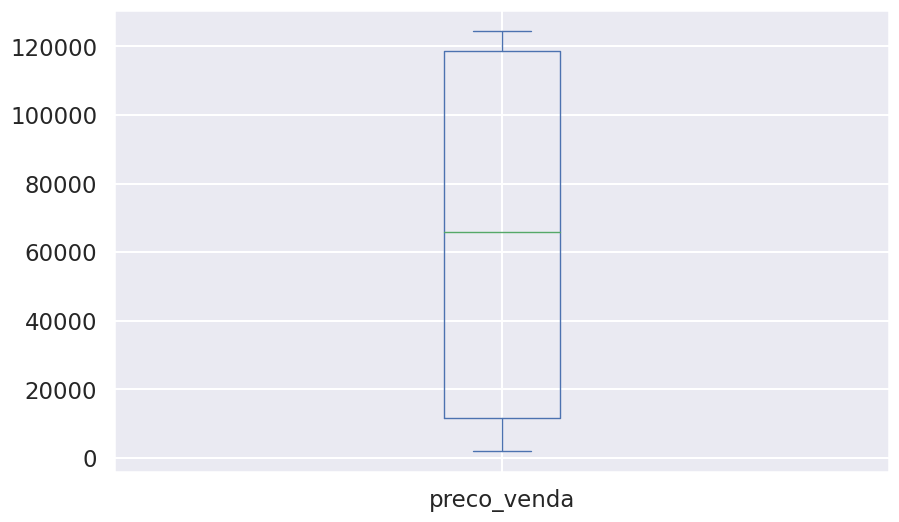

In [286]:
carros['preco_venda'].plot.box()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

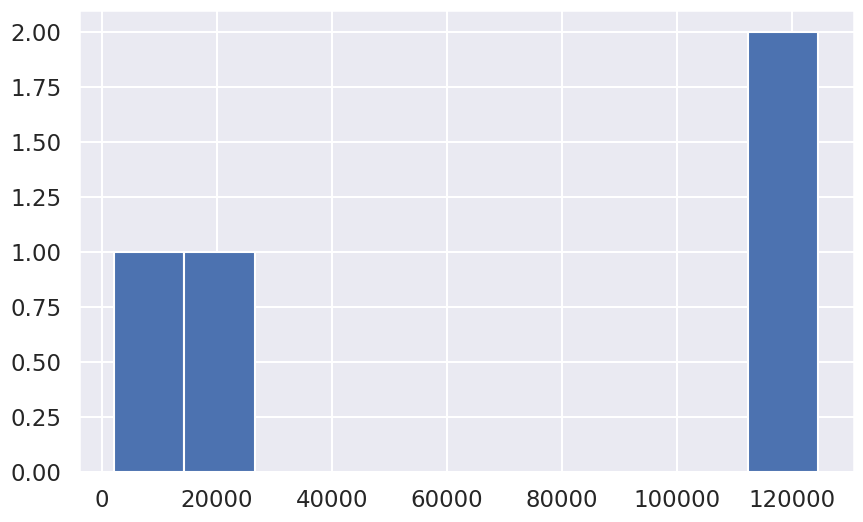

In [287]:
carros['preco_venda'].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

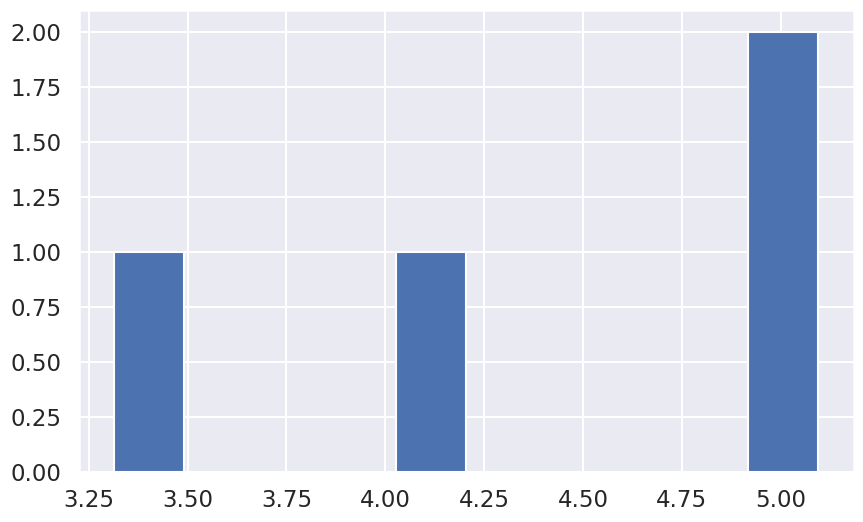

In [288]:
from numpy import log10
carros['preco_venda_log'] = log10(carros['preco_venda'])
carros['preco_venda_log'].hist()

In [289]:
from numpy import abs
mad = abs(carros['preco_venda_log'] - carros['preco_venda_log'].median()).median()*(1/0.6745)
print(mad)

0.6892104757942044


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [290]:
carros['preco_venda_log'].mad()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-290-38d0695a67c6>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  carros['preco_venda_log'].mad()


0.6710580660080577

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

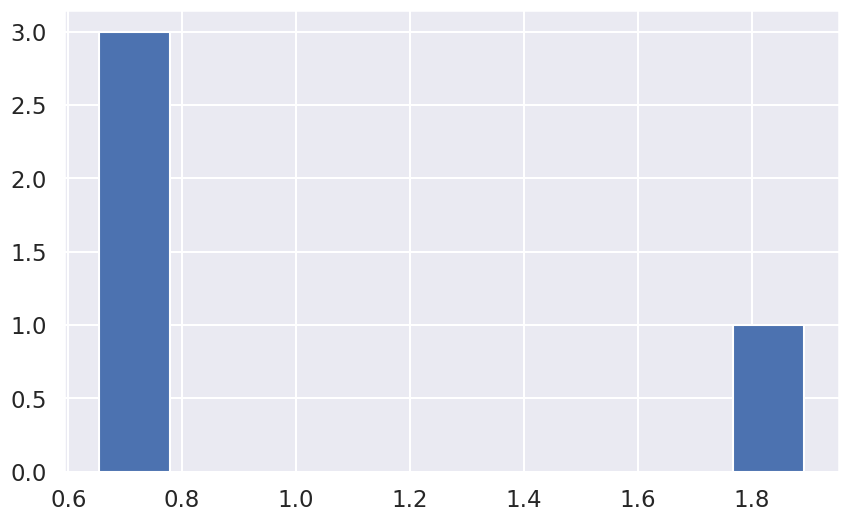

In [291]:
(abs(carros['preco_venda_log']-carros['preco_venda_log'].median())/mad).hist()

In [292]:
carros[abs(carros['preco_venda_log']-carros['preco_venda_log'].median())/mad > 3.5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario,preco_venda_log


In [293]:
# Removendo outliers utilizando método de tukey (univariado)
carros = pd.read_excel("/content/preco-carros.xlsx")
carros = carros[carros['preco_atu'] > 200000]
print(len(carros))
print(carros.head())

4
      modelo   ano  preco_atu  preco_venda  kms_rodado combustivel  \
59  fortuner  2014  224174.64    124617.66       41000      Diesel   
62  fortuner  2014  224174.64    116887.50       78000      Diesel   
63  fortuner  2015  224174.64     14649.90       47000      Diesel   
64  fortuner  2017  225857.82      2057.22        6000      Diesel   

   tipo_vendendor transmissao  proprietario  
59         Dealer   Automatic             0  
62         Dealer   Automatic             0  
63         Dealer   Automatic             0  
64         Dealer   Automatic             0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [294]:
carros['preco_atu'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count         4.000
mean     224595.435
std         841.590
min      224174.640
25%      224174.640
50%      224174.640
75%      224595.435
max      225857.820
Name: preco_atu, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

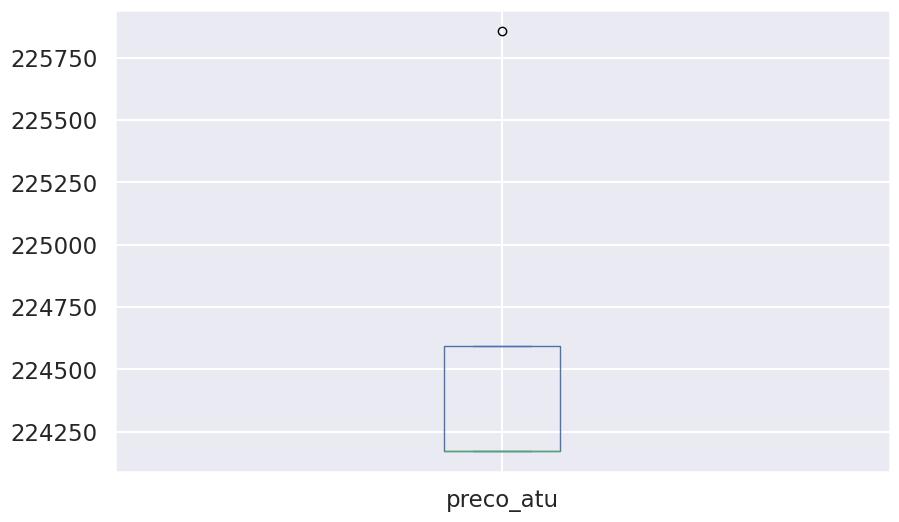

In [295]:
carros['preco_atu'].plot.box()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

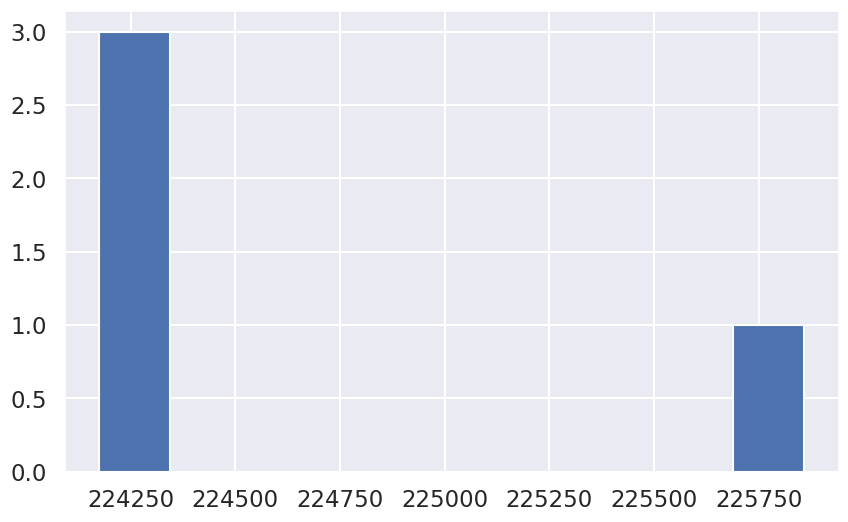

In [296]:
carros['preco_atu'].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

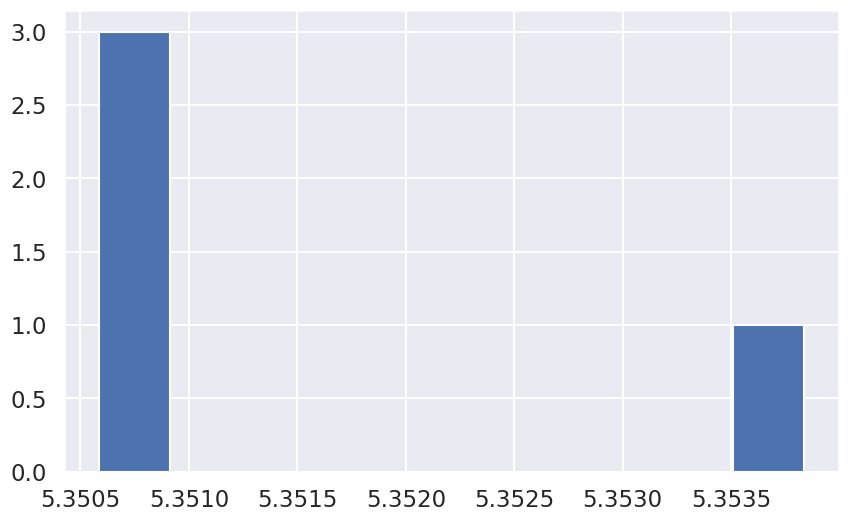

In [297]:
carros['preco_atu_log'] = log10(carros['preco_atu'])
carros['preco_atu_log'].hist()

In [298]:
q1 = carros['preco_atu_log'].quantile(q=0.25)
q3 = carros['preco_atu_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.0008121627433359535


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [299]:
carros[carros['preco_atu_log'] < (q1-1.5*iqr)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario,preco_atu_log


In [300]:
carros[carros['preco_atu_log'] > (q3+1.5*iqr)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario,preco_atu_log
64,fortuner,2017,225857.82,2057.22,6000,Diesel,Dealer,Automatic,0,5.353835


In [301]:
carros = carros[(carros['preco_atu_log'] > (q1-1.5*iqr)) & (carros['preco_atu_log'] < (q3+1.5*iqr))]
len(carros)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='kms_rodado', ylabel='preco_atu'>

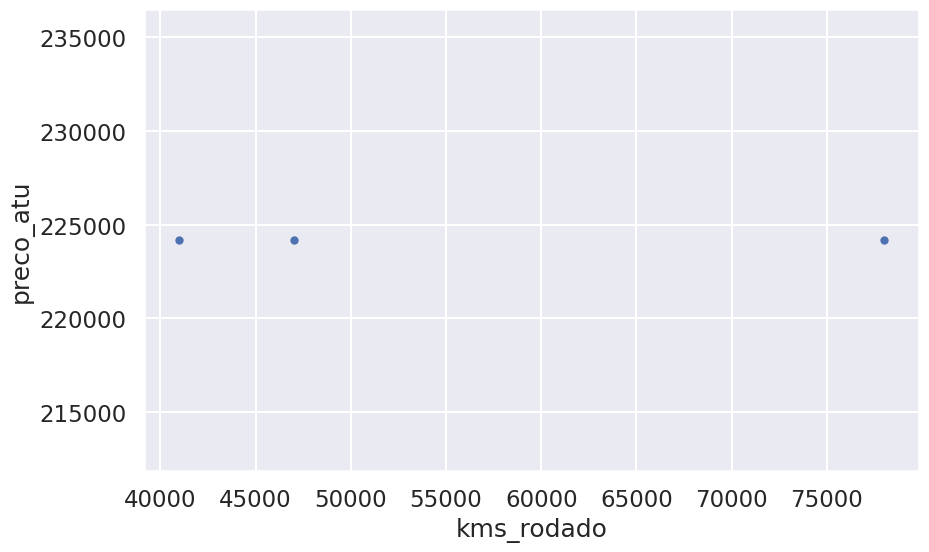

In [302]:
# Removendo outliers usando razão de duas variáveis (bivariado)
carros.plot.scatter(x='kms_rodado',y='preco_atu')

In [303]:

carros['preco_atu_kms'] = carros['preco_atu'] / carros['kms_rodado']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [304]:
carros['preco_atu_kms'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    3.000000
mean     4.370460
std      1.342114
min      2.874034
25%      3.821854
50%      4.769673
75%      5.118674
max      5.467674
Name: preco_atu_kms, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

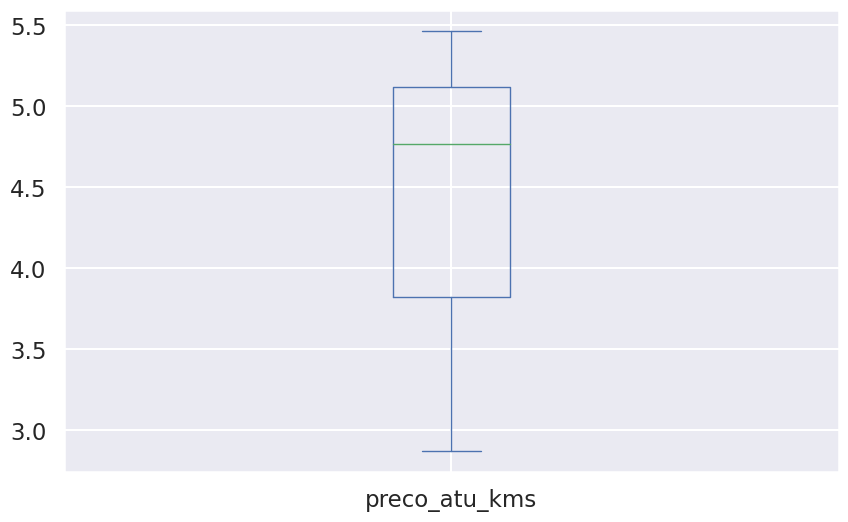

In [305]:
carros['preco_atu_kms'].plot.box()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

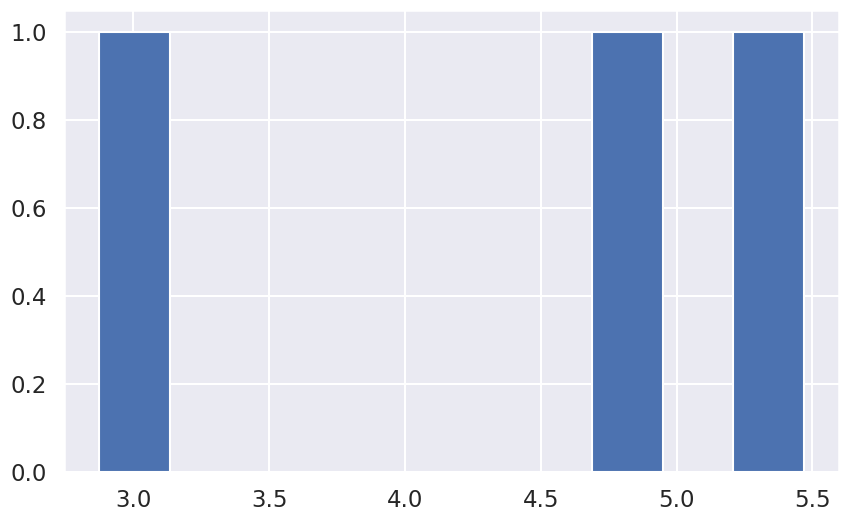

In [306]:

carros['preco_atu_kms'].hist()

In [307]:

carros['preco_atu_kms'] = log10(carros['preco_atu_kms'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

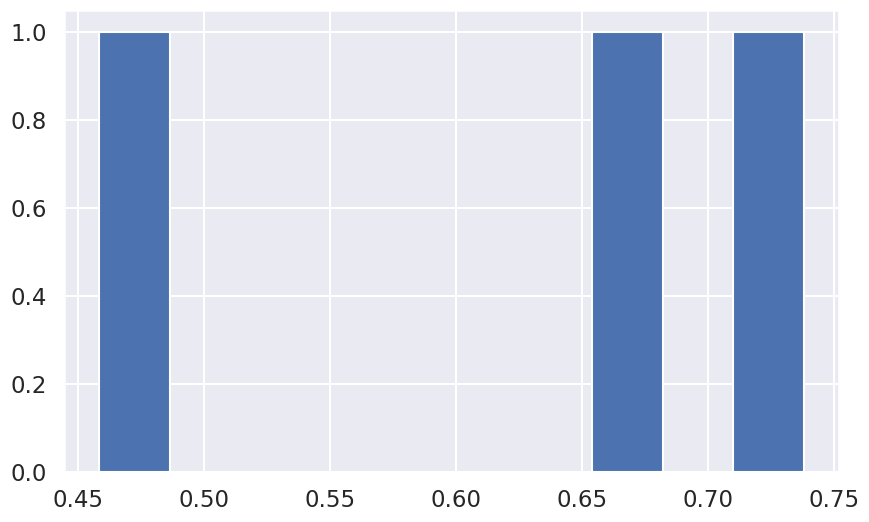

In [308]:

carros['preco_atu_kms'].hist()

In [309]:
mad = abs(carros['preco_atu_kms'] - carros['preco_atu_kms'].median()).median()*(1/0.6745)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

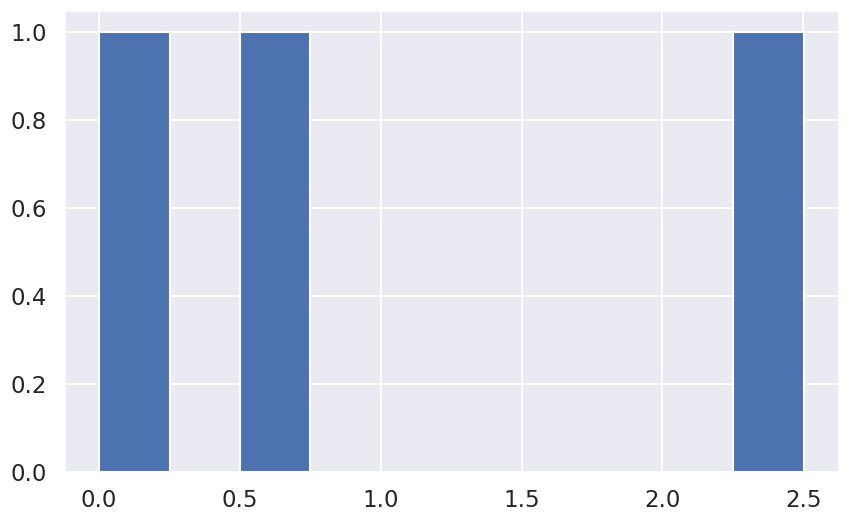

In [310]:

(abs(carros['preco_atu_kms']-carros['preco_atu_kms'].median())/mad).hist()

In [311]:

carros[abs(carros['preco_atu_kms']-carros['preco_atu_kms'].median())/mad > 2.5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario,preco_atu_log,preco_atu_kms
62,fortuner,2014,224174.64,116887.5,78000,Diesel,Dealer,Automatic,0,5.350586,0.458492


In [312]:
carros = carros[abs(carros['preco_atu_kms']-carros['preco_atu_kms'].median())/mad < 3.5]
print(len(carros))


3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [313]:
# Removendo outliers com Elliptic Envelope (multivariado)
carros = pd.read_excel("/content/preco-carros.xlsx")
carros = carros[carros['preco_atu'] > 200000]
carros = carros.dropna()
print(carros.head())


      modelo   ano  preco_atu  preco_venda  kms_rodado combustivel  \
59  fortuner  2014  224174.64    124617.66       41000      Diesel   
62  fortuner  2014  224174.64    116887.50       78000      Diesel   
63  fortuner  2015  224174.64     14649.90       47000      Diesel   
64  fortuner  2017  225857.82      2057.22        6000      Diesel   

   tipo_vendendor transmissao  proprietario  
59         Dealer   Automatic             0  
62         Dealer   Automatic             0  
63         Dealer   Automatic             0  
64         Dealer   Automatic             0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [314]:
carros.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


modelo             object
ano                 int64
preco_atu         float64
preco_venda       float64
kms_rodado          int64
combustivel        object
tipo_vendendor     object
transmissao        object
proprietario        int64
dtype: object

In [315]:
#ajustando tipos dos dados
carros['modelo'] = carros['modelo'].astype('category')
carros['combustivel'] = carros['combustivel'].astype('category')
carros['tipo_vendendor'] = carros['tipo_vendendor'].astype('category')
carros['transmissao'] = carros['transmissao'].astype('category')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [316]:
carros['modelo'] = carros['modelo'].cat.codes
carros['combustivel'] = carros['combustivel'].cat.codes
carros['tipo_vendendor'] = carros['tipo_vendendor'].cat.codes
carros['transmissao'] = carros['transmissao'].cat.codes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [317]:
carros.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario
59,0,2014,224174.64,124617.66,41000,0,0,0,0
62,0,2014,224174.64,116887.50,78000,0,0,0,0
63,0,2015,224174.64,14649.90,47000,0,0,0,0
64,0,2017,225857.82,2057.22,6000,0,0,0,0


In [318]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01)
detector.fit(carros)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


EllipticEnvelope(contamination=0.01)

In [319]:

scores = detector.predict(carros)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [320]:
scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 1, -1,  1,  1])

In [321]:
carros['outlier'] = scores
print(carros.head())

    modelo   ano  preco_atu  preco_venda  kms_rodado  combustivel  \
59       0  2014  224174.64    124617.66       41000            0   
62       0  2014  224174.64    116887.50       78000            0   
63       0  2015  224174.64     14649.90       47000            0   
64       0  2017  225857.82      2057.22        6000            0   

    tipo_vendendor  transmissao  proprietario  outlier  
59               0            0             0        1  
62               0            0             0       -1  
63               0            0             0        1  
64               0            0             0        1  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [322]:

carros[carros['outlier'] == -1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario,outlier
62,0,2014,224174.64,116887.5,78000,0,0,0,0,-1


In [323]:

carros = carros[carros['outlier'] != -1]
len(carros)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3

In [324]:
# Removendo outliers com Isolation Forests (multivariado)
carros = pd.read_excel("/content/preco-carros.xlsx")
carros = carros[carros['preco_atu'] > 200000]
carros = carros.dropna()
print(carros.head())

      modelo   ano  preco_atu  preco_venda  kms_rodado combustivel  \
59  fortuner  2014  224174.64    124617.66       41000      Diesel   
62  fortuner  2014  224174.64    116887.50       78000      Diesel   
63  fortuner  2015  224174.64     14649.90       47000      Diesel   
64  fortuner  2017  225857.82      2057.22        6000      Diesel   

   tipo_vendendor transmissao  proprietario  
59         Dealer   Automatic             0  
62         Dealer   Automatic             0  
63         Dealer   Automatic             0  
64         Dealer   Automatic             0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [325]:
#ajustando tipos dos dados
carros['modelo'] = carros['modelo'].astype('category')
carros['combustivel'] = carros['combustivel'].astype('category')
carros['tipo_vendendor'] = carros['tipo_vendendor'].astype('category')
carros['transmissao'] = carros['transmissao'].astype('category')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [326]:
carros['modelo'] = carros['modelo'].cat.codes
carros['combustivel'] = carros['combustivel'].cat.codes
carros['tipo_vendendor'] = carros['tipo_vendendor'].cat.codes
carros['transmissao'] = carros['transmissao'].cat.codes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [327]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(carros)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_iforest.py:307: UserWarning: max_samples (100) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  warn(


IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x7E749E514940)

In [328]:
scores = clf.predict(carros)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [331]:
scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 1,  1,  1, -1])

In [332]:
carros['outlier'] = scores
print(carros.head())

    modelo   ano  preco_atu  preco_venda  kms_rodado  combustivel  \
59       0  2014  224174.64    124617.66       41000            0   
62       0  2014  224174.64    116887.50       78000            0   
63       0  2015  224174.64     14649.90       47000            0   
64       0  2017  225857.82      2057.22        6000            0   

    tipo_vendendor  transmissao  proprietario  outlier  
59               0            0             0        1  
62               0            0             0        1  
63               0            0             0        1  
64               0            0             0       -1  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [333]:

carros[carros['outlier'] == -1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario,outlier
64,0,2017,225857.82,2057.22,6000,0,0,0,0,-1


In [334]:
carros = carros[carros['outlier'] != -1]
len(carros)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3

# Fazendo teste para expectativa da Média

In [335]:
# importar a bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math # biblioteca para cálculos matemáticos
import seaborn as sns # biblioteca para apresentação visual
#configurações visuais da biblioteca seaborn para os gráficos
sns.set(rc={'figure.figsize':(10, 6)}) # tamanho da área de plotagem
sns.set_context("talk") # fontes maiores na visualização

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [336]:
# Lista com a expectativa MÈDIA de carro nos preço atual, preço venda e kms rodados
# cada coluna representa a média da expectativa da média em cada ano apurado de 2003 a 2018
PrecoAtualMedia = [17.424,29.736,30.702,12.935,21.413,30.640,25.310,26.837,27.710,27.803,1.122,32.354,30.982,24.032,22.473,33.632,33.632,33.632,15.865,24.873,12.312,17.798,24.967,10.784,13.745,15.553,18.296,20.229,12.312,32.354,18.639,15.242,23.346,31.014,25.123,24.125,2.244,7.106,11.719,24.873,
                  24.530,12.405,22.286,25.123,8.384,37.528,15.242,12.935,24.032,28.956,95.411,95.411,61.623,95.411,31.824,46.879,22.660,57.789,2.119,112.087,58.007,2.400,112.087,112.087,112.928,21.663,72.158,63.742,42.827,65.176,21.070,38.900,58.007,17.798,27.834,2.119,45.757,38.494,71.161,95.411,
                  46.412,24.468,79.140,41.954,41.954,73.966,28.863,42.827,18.857,21.070,58.007,50.152,4.270,95.411,71.005,58.007,79.140,58.100,58.007,63.742,592,5.672,5.548,498,4.581,7.387,10.753,467,467,4.581,5.548,467,748,436,4.581,4.581,4.581,592,4.581,592,3.927,467,3.646,4.581,
                  5.454,5.454,2.961,249,2.711,2.618,2.711,2.555,2.961,2.961,2.524,2.306,374,24.530,2.711,792.961,374,249,2.61,2.618,3.085,2.524,24.530,2.618,2.929,2.929,25.746,1.714,3.085,3.085,2.742,1.589,1.620,2.618,1.683,1.589,2.961,25.746,3.085,2.961,1.683,1.683,1.714,2.524,
                  2.275,1.683,2.587,1.714,1.994,1.589,24.530,3.272,1.776,1.620,3.272,1.589,1.496,1.807,1.464,2.337,751.807,1.620,1.589,1.776,1.776,2.337,1.776,2.337,2.026,24.530,997,1.620,1.589,1.776,1.807,2.337,21.164,1.776,1.433,13.808,1.776,22.224,1.776,2.524,1.776,1.433,46.100,
                  4.239,21.164,1.776,2.929,13.808,13.808,2.929,2.929,13.808,21.164,2.368,2.929,2.929,1.433,1.776,13.808,2.929,21.164,2.929,2.929,46.100,1.776,1.776,2.929,13.808,4.239,2.929,13.808,2.929,22.224,22.224,2.368,2.929,2.929,21.164,2.929,1.433,2.368,4.239,3.085,21.257,3.085,
                  3.085,16.675,4.239,4.239,4.239,218,4.239,18.608,1.807,2.400,218,2.711,218,2.929,1.807,311,311,311,311,2.337,2.119,4.239,4.239,4.239,2.618,4.239,1.839,2.368,436,3.678,1.839,2.649,2.462,2.337,4.239,4.239,1.994,1.901,2.618,3.085,2.119,40.801,3.615,1.839,342,3.896,1.839]

PrecoVendaMedia = [10.442, 14.806,22.598,8.883,1.434,28.832,21.040,2.026,27.274,23.222,8.883,21.351,2.338,1.901,7.013,24.157,22.598, 24.157,10.130,8.260,8.883,1.527,1.371,779,904,94, 12.936,187,6.078,23.222,966,7.325,15.429,187,1.714,9.195,14.494,1.091,94,7.013,18.234,7.948,6.078,1.714,3.896,
                   2.338,8.260,3.273,1.808,24.157,4.644,717,561,499,8.572,1.122,1.403,14.806,1.278,62.309,21.663,1.403,58.444,7.325,1.029,14.806,61.561,28.832,13.559,44.417,12.312,1.403,23.222,8.260,1.527,12.312,1.714,468,16.364,4.520,45.913,14.806,717,3.896,10.878,779,1.091,1.839,10.754,14.806,1.184,
                   35.066,10.941,717,125,18.234,64.678,530,21.975,30.079,5.455,530,5.143,4.520,4.208,4.208,4.208,3.896,374,374,374,3.585,3.585,3.585,3.585,3.460,343,343,343,3.273,3.273,3.273,3.273,31,2.961,281,281,2.338,249,2.431,2.338,2.338,2.338,2.244,2.026,2.026,2.026,2.026,187,187,187,187,187,187,
                   187,187,1.714,1.714,1.621,1.590,156,156,156,156,156,1.496,1.496,1.496,1.496,1.403,1.403,1.403,1.403,1.403,1.403,1.403,1.403,1.309,1.309,125,125,125,125,125,1.184,1.184,1.091,1.091,1.091,966,94,94,94,842,779,779,779,779,779,62, 62,62,62,62,62,561,530,499,468,374,31,10.130,1.371,
                   9.195,8.572,16.364,17.923,16.053,2.462,15.117,966,36.625,35.066,904,16.364,1.403,904,9.819,20.105,1.403,1.091,1.403,187,25.715,15.928,842,16.364,7.948,15.429,966,19.170,28.832,35.690,1.216,1.714,2.836,966,35.066,1.496,62,16.676,14.806,1.371,19.481,18.546,1.621,11.689,18.546,
                   125,16.364,4.021,156,1.683,2.244,16.364,94,31.949,2.649,2.618,1.216,28.521,1.714,125,2.057,125,2.026,11.377,26.027,1.496,2.088,1.278,94,2.338,7.013,1.652,3.398,26.962,3.023,187,19.481,16.364,655,25.715,28.022,1.091,2.307,17.611,17.923,2.618,31.513,1.403,1.683,1.995,10.130,11.689,26.650,2.961,125,10.442,3.585,1.652]

KmsRodadoMedia = [13500,21500,3450,2600,21225,1035,9398,16714,10136,21183,1067,25500.7500,13000,38713,21500,20839,21500,17750,20721,12500,1200,25000,22640,28439,10000,27569,8100,22271,22500,25719,27100,19500,22500,22500,24999,24383,63500,5039,31000,12262,23353,29000,22890,25000,7500,32266,32500,12935,
                  18500,52353,20000,7500,67500,45000,35000,20267,25000,19742,20500,20000,20294,39000,23500,3000,22500,5500,29500,44000,6000,35500,22500,28000,21500,41500,18000,36000,67577,40000,44500,11500,20000,7500,19000,98588,71000,39000,28000,23500,20000,31000,29121,37500,20000,44500,
                  36000,14500,4350,22500,25012,1500,700,2000,600,2050,10850,8250,7500,9000,5500,3000,4350,3500,17500,8500,8750,16500,7000,13000,2700,2850,3450,3000,23250,5750,20000,650,3500,1500,2500,5500,9000,1750,250,5900,2500,11750,8000,7500,8300,16000,10000,14500,12500,
                  12500,9500,7500,29000,22500,12000,3000,15500,6500,22500,4000,2150,7500,11500,4300,2000,12000,11500,7250,13500,7000,250,500,21000,6000,7000,2750,3350,6850,650,19300,37500,15000,12000,9500,106500,30000,25000,15000,10500,13000,950,11000,16000,9000,27500,30000,12500,24500,12000,25000,17500,250000,16500,
                  17500,26500,46116,29000,14100,26730,14141,1746,6239,17398,1717,10562,17887,21767,11335,15802,10057,18050,6250,7500,22539,18000,19244,16000,38816,30690,18099,11258,12339,28500,30000,26066,22500,7500,6450,26500,2246,7570,5924,34000,30120,11854,16161,17933,17000,3500,24500,
                  35500,17500,18000,15000,8500,17967,28350,15713,24000,27121,26837,24781,20162,12500,18027,14611,2800,20011,8001,20013,10600,17500,9717,9500,9414,34670,34781,13800,30601,8250,15376,12400,10890,2000,20063,7232,25228,31500,4505,4900,7529,14284,22000,17000,5490,9500,15713,6000,19000,16509,30038,16994,30000,43967,4500,2732]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [337]:
# Analisando os dados do PrecoAtualMedia
# podemos perceber que a média está muito longe da mediana o que
# sugere um desvio padrão alto e uma distribuição anormal dos dados.
PrecoAtulMedia = PrecoAtualMedia
a=pd.Series(PrecoAtualMedia).mean()
b=pd.Series(PrecoAtualMedia).median()
c=pd.Series(PrecoAtualMedia).std()
print('Media = ',a)
print('Mediana = ',b)
print('Desvio Padrão = ',c)

Media =  55.35759000000001
Mediana =  5.609999999999999
Desvio Padrão =  137.68552238410004


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [338]:
# Analisando os dados do PrecoVendaMedia
# podemos perceber que a média está muito longe da mediana o que
# sugere um desvio padrão alto e uma distribuição anormal dos dados.
PrecoVendaMedia = PrecoVendaMedia
a=pd.Series(PrecoVendaMedia).mean()
b=pd.Series(PrecoVendaMedia).median()
c=pd.Series(PrecoVendaMedia).std()
print('Media = ',a)
print('Mediana = ',b)
print('Desvio Padrão = ',c)

Media =  110.73263455149502
Mediana =  14.806
Desvio Padrão =  227.1022340456371


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [339]:
# Analisando os dados do KmsRodadoMedia
# podemos perceber que a média está muito proxima da mediana o que
# sugere um desvio padrão alto e uma distribuição normal dos dados.
KmsRodadoMedia = KmsRodadoMedia
a=pd.Series(KmsRodadoMedia).mean()
b=pd.Series(KmsRodadoMedia).median()
c=pd.Series(KmsRodadoMedia).std()
print('Media = ',a)
print('Mediana = ',b)
print('Desvio Padrão = ',c)

Media =  18510.1125
Mediana =  16000.0
Desvio Padrão =  19465.55449785377


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


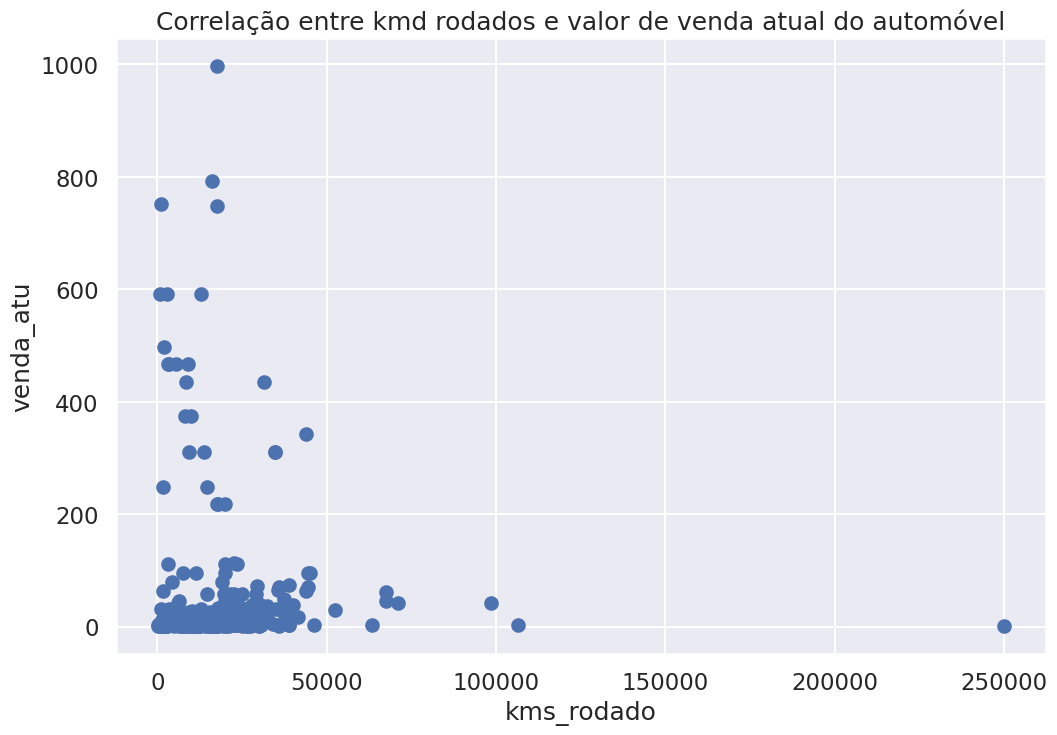

In [340]:

#### gráfico
plt.figure(figsize=(12, 8))
plt.title('Correlação entre kmd rodados e valor de venda atual do automóvel')
plt.xlabel('kms_rodado')
plt.ylabel('venda_atu')

#correlação que será analisada
plt.scatter(KmsRodadoMedia, PrecoAtualMedia)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


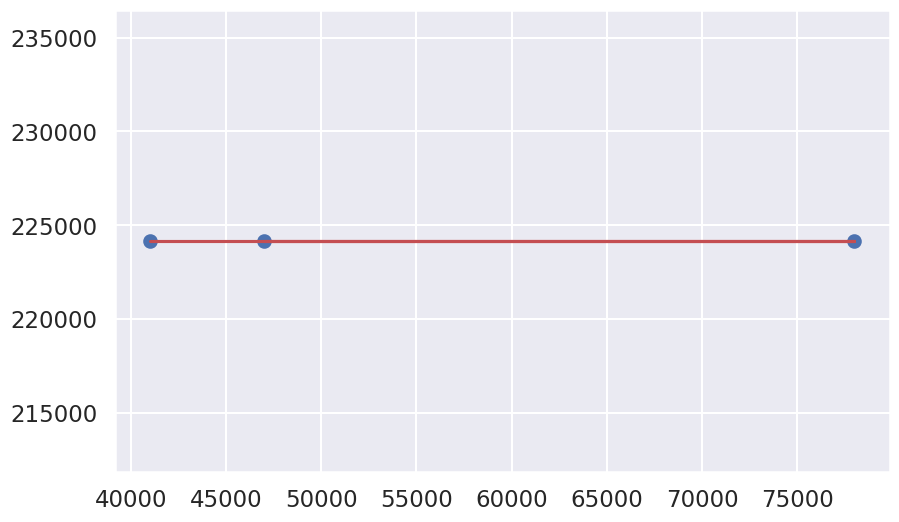

In [341]:
# Descobrindo a venda atual usando Machine Learning
# Veja que temos uma reta muito parecida com a que traçamos anteriormente, só que nesse caso tivemos menos trabalho e
# não precisamos criar nada de forma manual para tentar descobrir qual é a função para descobrir o valor atual de venda.
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(carros["kms_rodado"].values.reshape(-1,1),carros["preco_atu"])

reg.coef_

reg.intercept_

plt.scatter(carros["kms_rodado"],carros["preco_atu"])
x = np.array(carros["kms_rodado"])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,"r")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


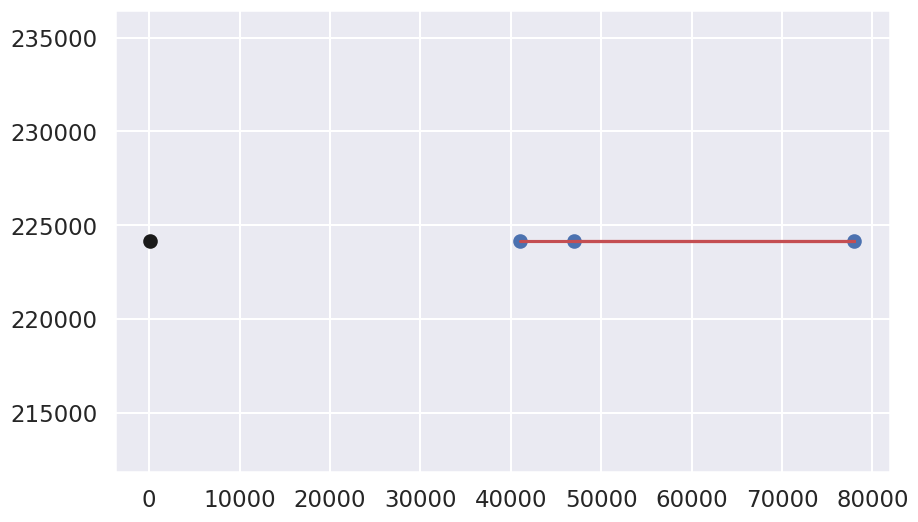

In [342]:
# Inserindo a informação no gráfico para verificar onde ela vai cruzar nossa linha
reg.predict([[75]])

plt.scatter(carros["kms_rodado"],carros["preco_atu"])
plt.scatter(75,reg.predict([[224000]])[0],color="k")
x = np.array(carros["kms_rodado"])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,"r")
plt.show()

In [343]:
reg.predict([[224000]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([224174.64])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


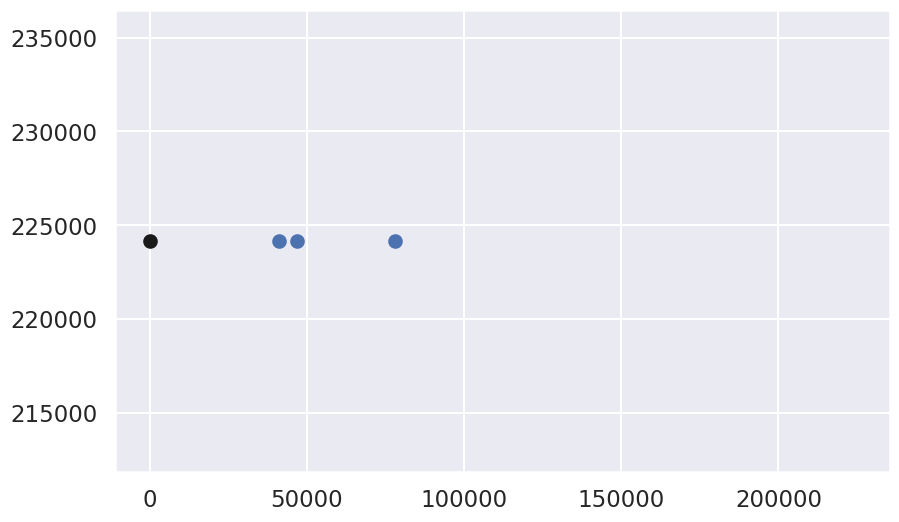

In [344]:
plt.scatter(carros["kms_rodado"],carros["preco_atu"])
plt.scatter(75,reg.predict([[224000]])[0],color="k")
x = np.array(carros["preco_atu"])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,"r")
plt.show()

In [345]:
# Função (plotar_histograma): Gera um histograma
def plotar_histograma(lista_dados,eixoX,titulo,cor,barras):
  fig, ax = plt.subplots(1, 1, figsize=(10, 8))
  fig.set_facecolor("white") # cor de fundo

  plt.hist(lista_dados,
           bins=barras,
           density=False,
           histtype='bar',
           color=cor,
          edgecolor='k')

  #exibição do gráfico
  ax.set_title(titulo)
  ax.set_ylabel("Frequencias de " +eixoX)
  ax.set_xlabel(eixoX)
  plt.show()
# esta função não irá retornar nenhum valor

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [346]:
# Função (plotar_boxplot): Gera um boxplot
def plotar_boxplot(lista_dados,titulo,atributoCalculo,cor):
  fig, ax = plt.subplots(1, 1, figsize=(10, 8))
  fig.set_facecolor("white") # cor de fundo
  ax = sns.boxplot(x=lista_dados, boxprops=dict(facecolor=cor));
  plt.xlabel(titulo, labelpad=14);
  ax.axes.set_title(atributoCalculo, fontsize=20, y=1.01);
# esta função não irá retornar nenhum valor

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


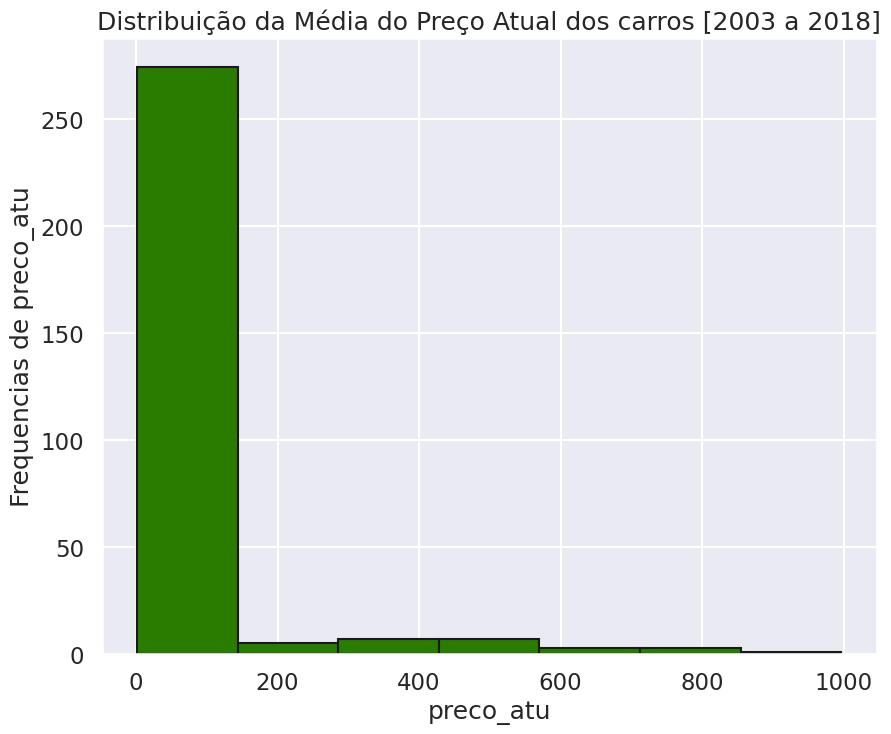

In [347]:
plotar_histograma(PrecoAtulMedia,'preco_atu','Distribuição da Média do Preço Atual dos carros [2003 a 2018]','#297c00',7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


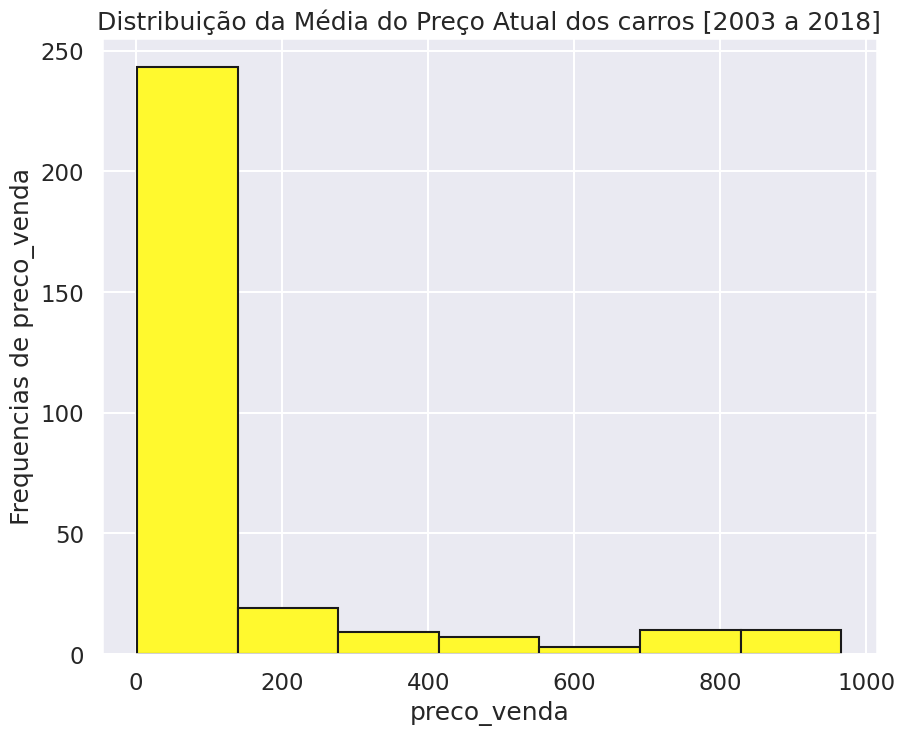

In [348]:
plotar_histograma(PrecoVendaMedia,'preco_venda','Distribuição da Média do Preço Atual dos carros [2003 a 2018]','#FFF92E',7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


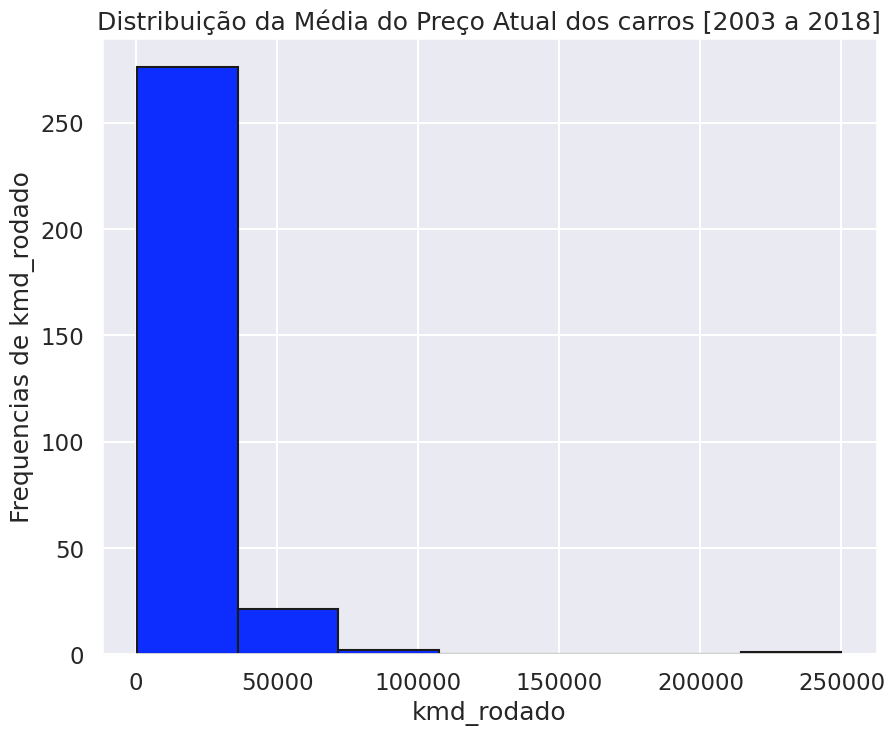

In [349]:
plotar_histograma(KmsRodadoMedia,'kmd_rodado','Distribuição da Média do Preço Atual dos carros [2003 a 2018]','#0D2DFF',7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


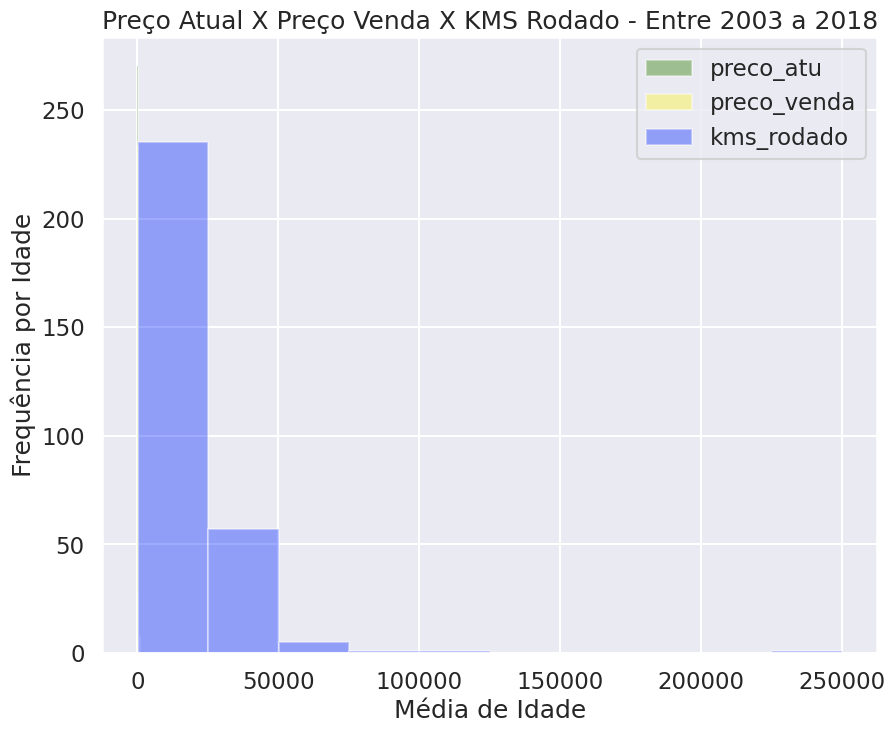

In [350]:
# Histrograma de comparação dos três média
#configuração do gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig.set_facecolor("white") # cor de fundo
plt.title('Preço Atual X Preço Venda X KMS Rodado - Entre 2003 a 2018')
plt.xlabel('Média de Idade')
plt.ylabel('Frequência por Idade')
#plotagem
plt.hist(PrecoAtulMedia,alpha=0.4, label='preco_atu', color='#297c00')
plt.hist(PrecoVendaMedia,alpha=0.4, label='preco_venda', color='#FFF92E')
plt.hist(KmsRodadoMedia,alpha=0.4, label='kms_rodado', color='#0D2DFF')
plt.legend();

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


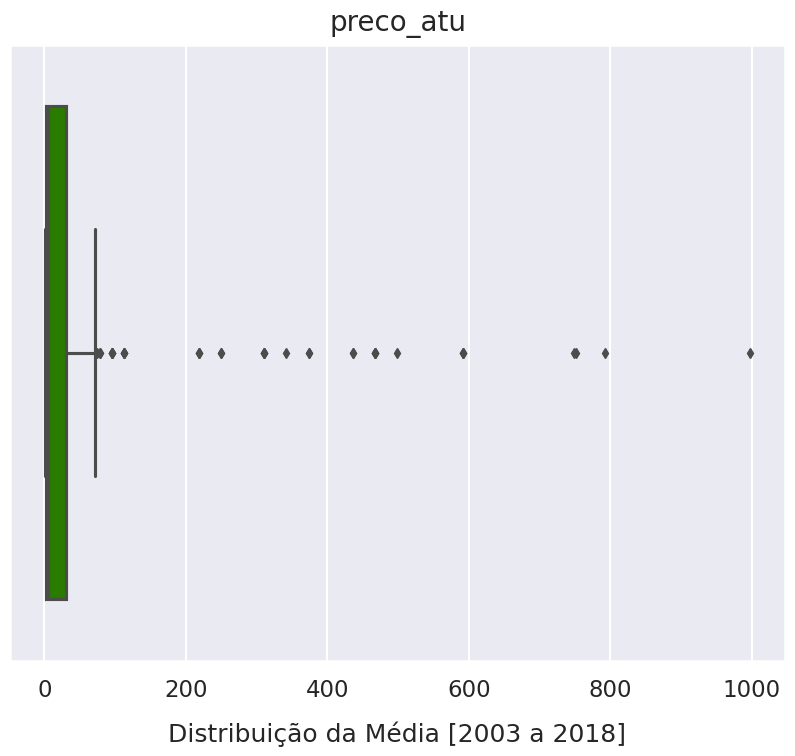

In [351]:

plotar_boxplot(PrecoAtulMedia,'Distribuição da Média [2003 a 2018]','preco_atu','#297c00')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


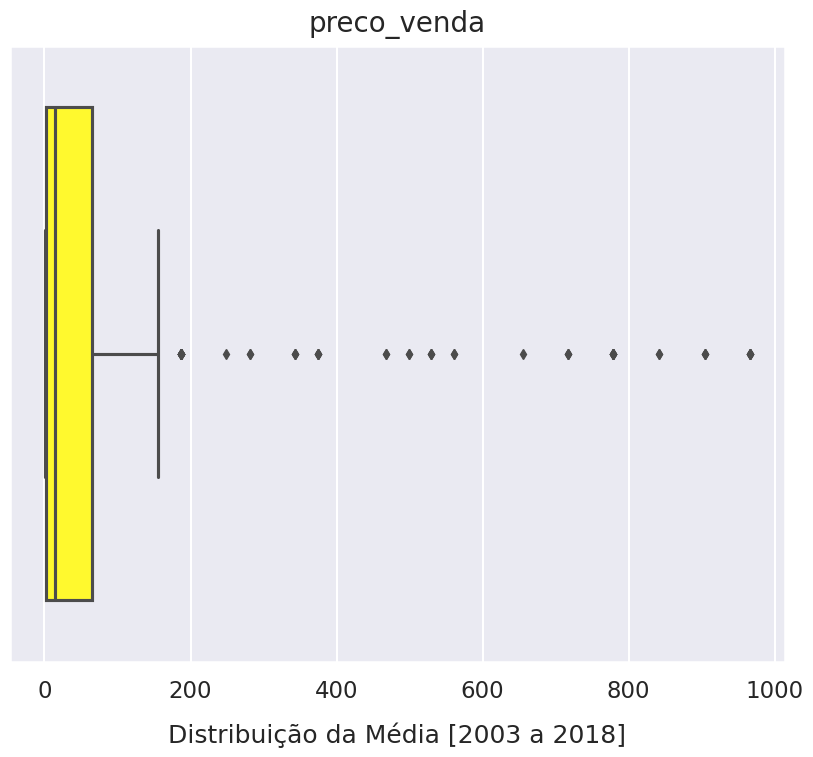

In [352]:
plotar_boxplot(PrecoVendaMedia,'Distribuição da Média [2003 a 2018]','preco_venda','#FFF92E')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


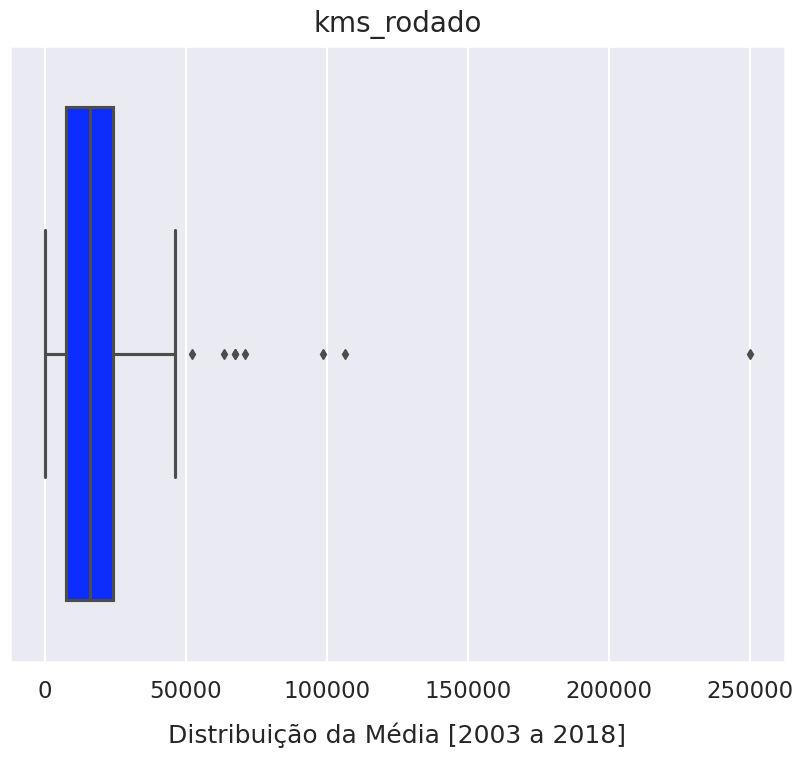

In [353]:
plotar_boxplot(KmsRodadoMedia,'Distribuição da Média [2003 a 2018]','kms_rodado','#0D2DFF')

# Machine Learning com Linguagem Python e Power BI Dentro do Colab

In [354]:
# Importar Bibliotecas
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [355]:
# Carrega os dados
carros = pd.read_excel('preco-carros.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [356]:
type(carros)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.frame.DataFrame

In [357]:
# Visualiza as 10 primeiras linhas
carros.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario
0,ritz,2014,34848.06,20883.90,27000,Petrol,Dealer,Manual,0
1,sx4,2013,59472.36,29611.50,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,61404.90,45196.50,6900,Petrol,Dealer,Manual,0
3,wagon_x0020_r,2011,25871.10,17766.90,5200,Petrol,Dealer,Manual,0
4,swift,2014,42827.58,2867.64,42450,Diesel,Dealer,Manual,0
5,vitara_x0020_brezza,2018,61280.22,57664.50,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,50620.08,42079.50,18796,Petrol,Dealer,Manual,0
7,s_x0020_cross,2015,53674.74,4052.10,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,55420.26,54547.50,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,55607.28,46443.30,42367,Diesel,Dealer,Manual,0


In [358]:
# Resumo estatístico
carros[['preco_atu', 'preco_venda', 'kms_rodado']].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,preco_atu,preco_venda,kms_rodado
count,301.000000,301.000000,301.000000
mean,32125.810963,15352.622990,36947.205980
std,46231.919646,22512.067545,38886.883882
min,436.380000,62.340000,500.000000
25%,4239.120000,1683.180000,15000.000000
50%,7792.500000,4052.100000,32000.000000
75%,45321.180000,21881.340000,48767.000000
max,225857.820000,129355.500000,500000.000000


In [359]:
# Cria o padronizador dos dados
padronizador = StandardScaler()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [360]:
# Aplica o padronizador somente nas colunas de interesse
dados_padronizados = padronizador.fit_transform(carros[['preco_atu', 'preco_venda', 'kms_rodado']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [361]:
# Visualiza os dados
print(dados_padronizados)

[[ 5.89805131e-02  2.46111919e-01 -2.56224461e-01]
 [ 5.92492999e-01  6.34442927e-01  1.55910503e-01]
 [ 6.34363599e-01  1.32789116e+00 -7.73969009e-01]
 [-1.35515178e-01  1.07422273e-01 -8.17758349e-01]
 [ 2.31865572e-01 -5.55514235e-01  1.41743363e-01]
 [ 6.31662270e-01  1.88264974e+00 -8.98356493e-01]
 [ 4.00698637e-01  1.18920151e+00 -4.67546664e-01]
 [ 4.66881198e-01 -5.02812170e-01 -9.06234809e-02]
 [ 5.04699805e-01  1.74396010e+00 -4.29501455e-01]
 [ 5.08751798e-01  1.38336702e+00  1.39605413e-01]
 [-6.47417031e-01  1.07422273e-01 -8.96707953e-01]
 [ 7.05948818e-01  1.21693944e+00  3.61977985e-01]
 [ 6.46519579e-01 -4.75074240e-01 -5.65325684e-01]
 [ 3.45321391e-01 -5.13907341e-01 -2.81982896e-01]
 [ 2.77788165e-01 -5.90053025e-02  1.04269615e+00]
 [ 7.61326064e-01  1.46658080e+00  1.55910503e-01]
 [ 7.61326064e-01  1.32789116e+00  1.21857851e-01]
 [ 7.61326064e-01  1.46658080e+00  1.55910503e-01]
 [-8.55271287e-03  2.18373989e-01 -3.72777615e-02]
 [ 3.81789333e-01  5.19464142e-

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [362]:
# Definimos o número de clusters (k)
k = 3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [363]:
# Criamos o modelo K-means
kmeans = KMeans(n_clusters = k)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [364]:
# Treinamento do modelo com os dados padronizados
kmeans.fit(dados_padronizados)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [365]:
# Atribuímos os rótulos dos clusters aos clientes
carros['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [366]:
# Exibe o resultado (10 primeiras linhas)
carros.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,modelo,ano,preco_atu,preco_venda,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario,cluster
0,ritz,2014,34848.06,20883.90,27000,Petrol,Dealer,Manual,0,2
1,sx4,2013,59472.36,29611.50,43000,Diesel,Dealer,Manual,0,2
2,ciaz,2017,61404.90,45196.50,6900,Petrol,Dealer,Manual,0,1
3,wagon_x0020_r,2011,25871.10,17766.90,5200,Petrol,Dealer,Manual,0,2
4,swift,2014,42827.58,2867.64,42450,Diesel,Dealer,Manual,0,2
5,vitara_x0020_brezza,2018,61280.22,57664.50,2071,Diesel,Dealer,Manual,0,1
6,ciaz,2015,50620.08,42079.50,18796,Petrol,Dealer,Manual,0,1
7,s_x0020_cross,2015,53674.74,4052.10,33429,Diesel,Dealer,Manual,0,2
8,ciaz,2016,55420.26,54547.50,20273,Diesel,Dealer,Manual,0,1
9,ciaz,2015,55607.28,46443.30,42367,Diesel,Dealer,Manual,0,1


In [367]:
# Salvamos o resultado em disco
carros.to_excel('segmentos.xlsx', index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [368]:
# Instala o pacote
!pip install -q powerbiclient

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [369]:
# Carrega as funções usadas para autenticar e gerar  relatórios
from powerbiclient import QuickVisualize, get_dataset_config, Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [370]:
# Define a autenticação no Power BI Service
device_auth = DeviceCodeLoginAuthentication()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code EA9YUM7H7 to authenticate.

Device flow authentication successfully completed.
You are now logged in .

The result should be passed only to trusted code in your notebook.


In [371]:
# Cria o relatório no Power BI
relatorio_PBI = QuickVisualize(get_dataset_config(carros), auth = device_auth)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [375]:
# Renderiza (Visualiza o relatório)
relatorio_PBI

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


QuickVisualize()

In [373]:
from google.colab import output
output.enable_custom_widget_manager()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [374]:
from google.colab import output
output.enable_custom_widget_manager()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

# Fim do Projeto